In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Import Data and remove ID columns

In [4]:
df = pd.read_csv("D:/Data Science/iNeuron/ML/Regression/Zomato_Delivery_Time_Prediction/data/finalTrain.csv")
df = df.drop(['ID', 'Delivery_person_ID'], axis=1)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Order_Date                   45584 non-null  object 
 7   Time_Orderd                  43853 non-null  object 
 8   Time_Order_picked            45584 non-null  object 
 9   Weather_conditions           44968 non-null  object 
 10  Road_traffic_density         44983 non-null  object 
 11  Vehicle_condition            45584 non-null  int64  
 12  Type_of_order                45584 non-null  object 
 13  Type_of_vehicle 

In [6]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

Separate numerical and categorical columns

In [7]:
numerical_cols = df.columns[df.dtypes != 'object']
categorical_cols = df.columns[df.dtypes == 'object']
numerical_cols = numerical_cols.drop(['Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)'])
categorical_cols = categorical_cols.insert(-1, ['Vehicle_condition', 'multiple_deliveries'])
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude'],
      dtype='object')

Feature Extraction -- Distance (Can Apply Directly as there are no missing values in Lat Long Columns)

In [8]:
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert coordinates from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Radius of the Earth in kilometers
    radius = 6371.0

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c

    return distance

In [9]:
for i in range(len(df)):

    lat1 = df.loc[i, 'Restaurant_latitude']
    lon1 = df.loc[i, 'Restaurant_longitude']
    lat2 = df.loc[i, 'Delivery_location_latitude']
    lon2 = df.loc[i, 'Delivery_location_longitude']


    df.loc[i, 'Distance'] = calculate_distance(lat1, lon1, lat2, lon2)

In [10]:
numerical_cols = numerical_cols.insert(len(numerical_cols), ['Distance'])
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Distance'],
      dtype='object')

Visualize outliers using boxplot

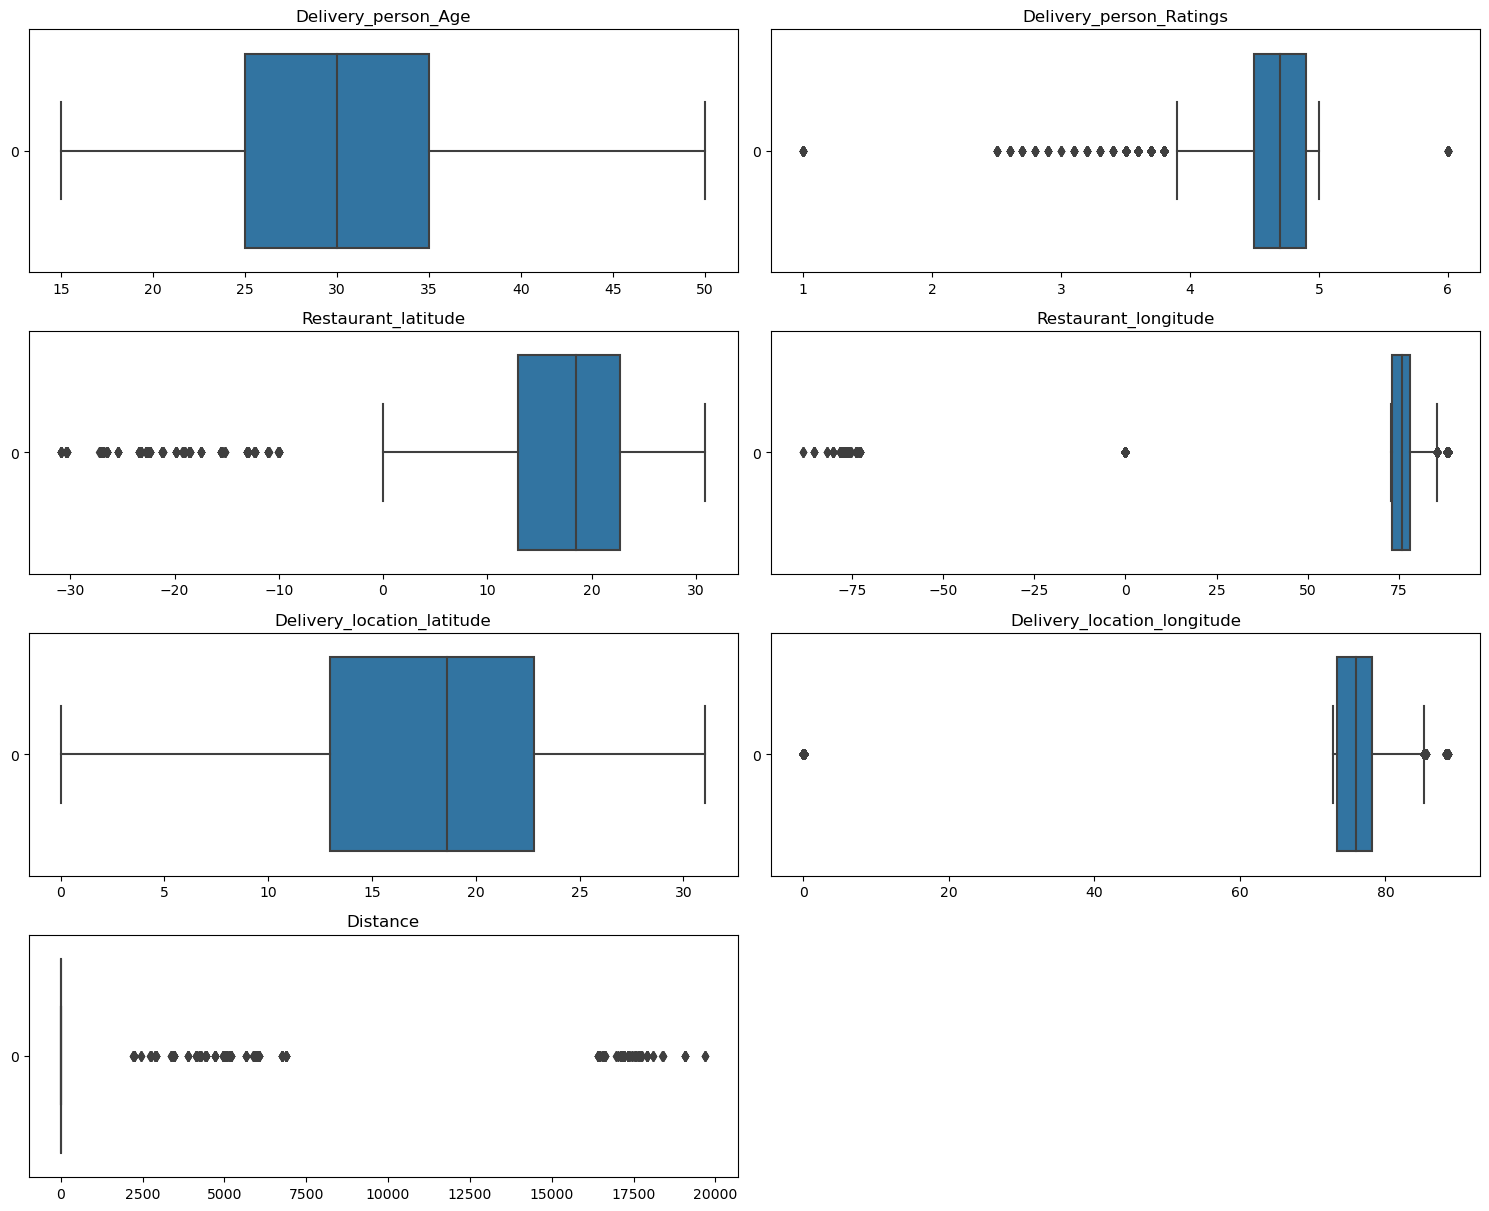

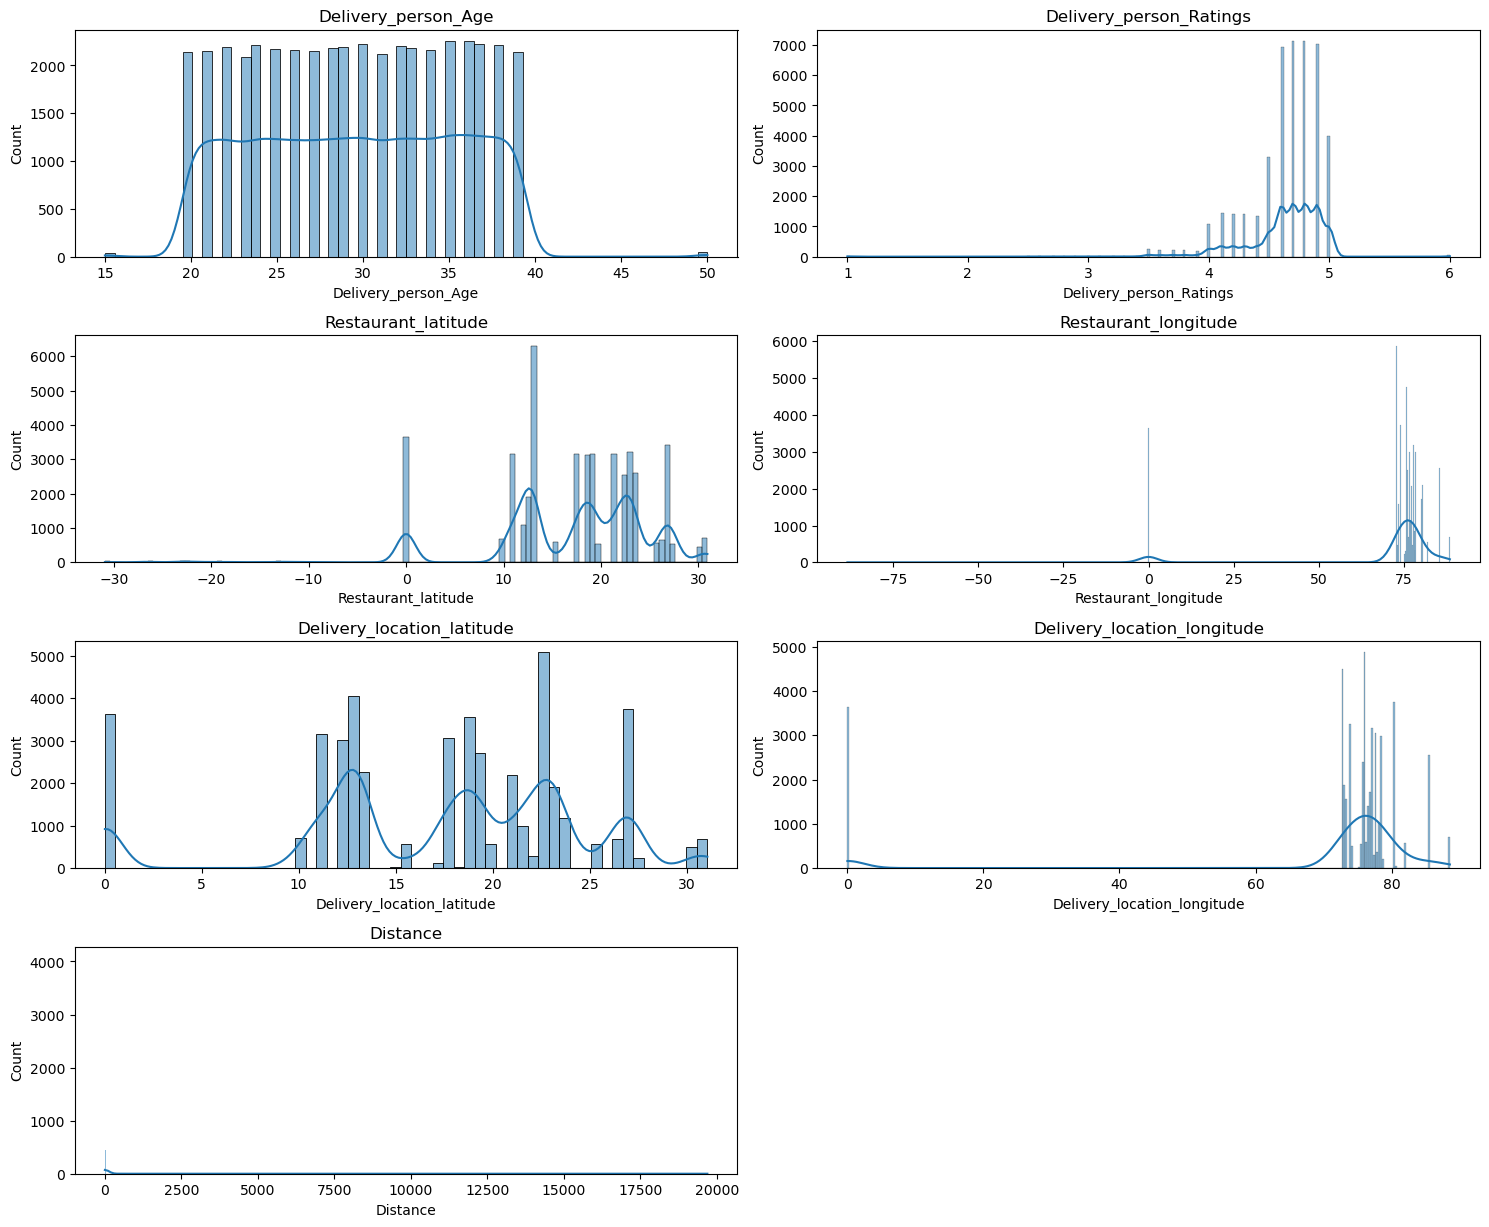

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for i, col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [12]:
# feature = 'Restaurant_latitude'
# feature = 'Restaurant_longitude'
# feature = 'Delivery_location_latitude'
# feature = 'Delivery_location_longitude'
feature = 'Distance'

# Calculate Q1, Q3, and IQR
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Boundary: {lower_bound} \nUpper Boundary: {upper_bound}")

outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Get the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers:", num_outliers)

Lower Boundary: -8.987232986844802 
Upper Boundary: 27.414703351191108
Number of outliers: 431


In [11]:
df['Distance'].min()

1.4650674052309467

In [12]:
df['Distance'][df['Distance'].sort_values() > 28].value_counts()

Distance
5990.501631     3
5019.120579     2
17182.975863    2
5900.011454     2
5899.347621     2
               ..
4432.249525     1
17556.887979    1
17334.093054    1
4421.226505     1
17340.702823    1
Name: count, Length: 420, dtype: int64

Distance Feature has only 431 outliers and they are above 21 kms. We can either drop them or replace them with border values.
Lets consider dropping them.

In [13]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,1.489846
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,11.007735
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,4.657195
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,6.232393


In [14]:
df.drop(df[df['Distance'] > 21].index, inplace =True)
df = df.reset_index(drop=True)

In [15]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,1.489846
45149,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,11.007735
45150,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,4.657195
45151,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,6.232393


Handling Missing Values and Outliers in 'Delivery_person_Age', 'Delivery_person_Ratings'

In [16]:
# Random sample imputation
def random_sample_impute(series):
    num_missing = series.isnull().sum()
    print(f"Before: {num_missing}")
    if num_missing == 0:
        return series
    else:
        imputed_series = series.copy()
        imputed_series[pd.isnull(imputed_series)] = np.random.choice(series.dropna(), num_missing, replace=True)
        return imputed_series


In [17]:
df['Delivery_person_Age'] = df[['Delivery_person_Age']].apply(random_sample_impute)
print(f"After: {df['Delivery_person_Age'].isnull().sum()}")

Before: 1611
After: 0


<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

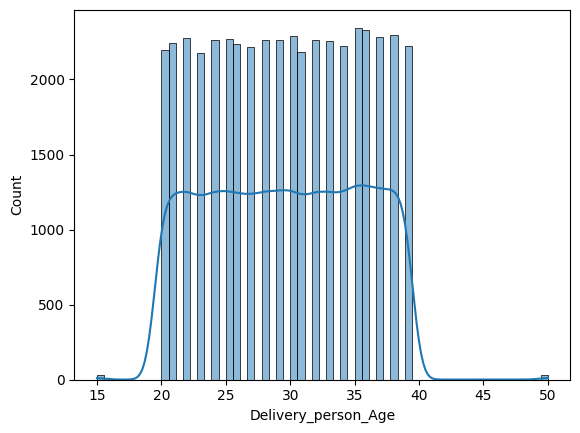

In [18]:
sns.histplot(df['Delivery_person_Age'], kde=True)

In [19]:
# Replace values above 5 with 5
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].map(lambda x: 5 if x > 5 else x)

In [20]:
df['Delivery_person_Ratings'] = df[['Delivery_person_Ratings']].apply(random_sample_impute)
print(f"After: {df['Delivery_person_Ratings'].isnull().sum()}")

Before: 1660
After: 0


<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

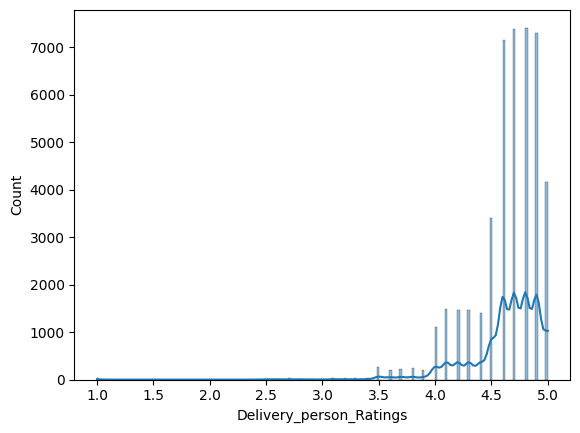

In [21]:
sns.histplot(df['Delivery_person_Ratings'], kde=True)

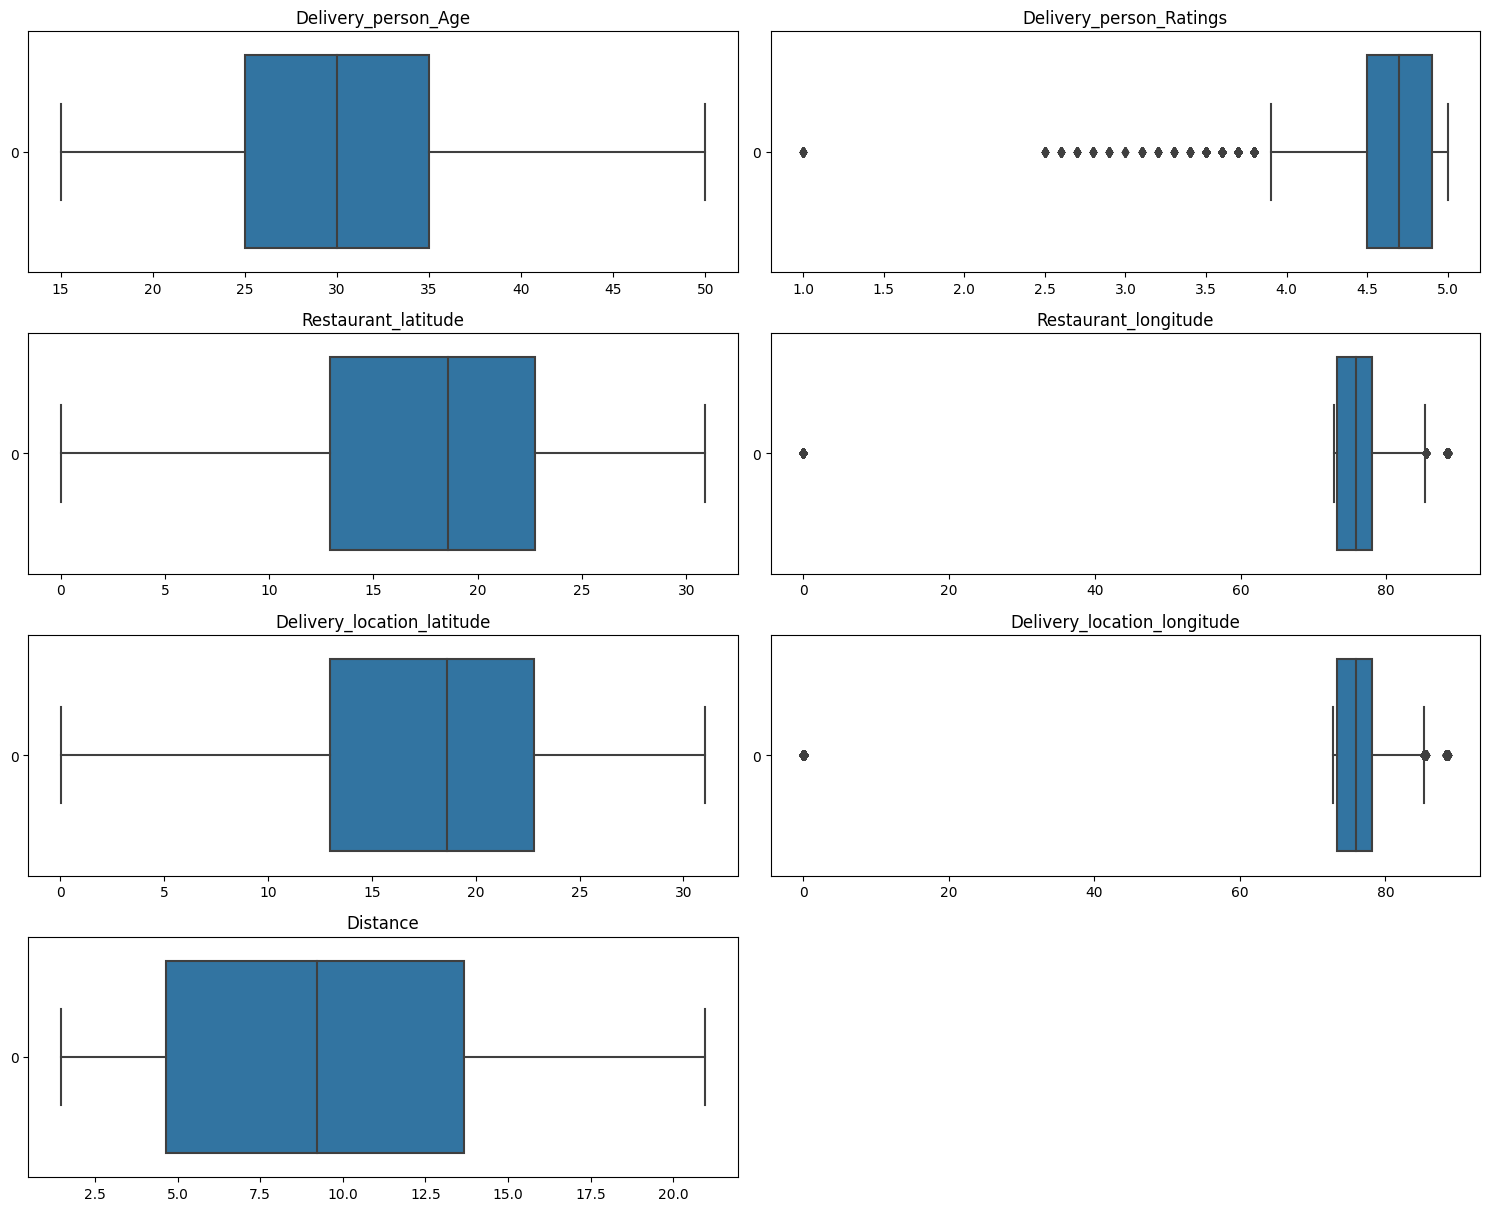

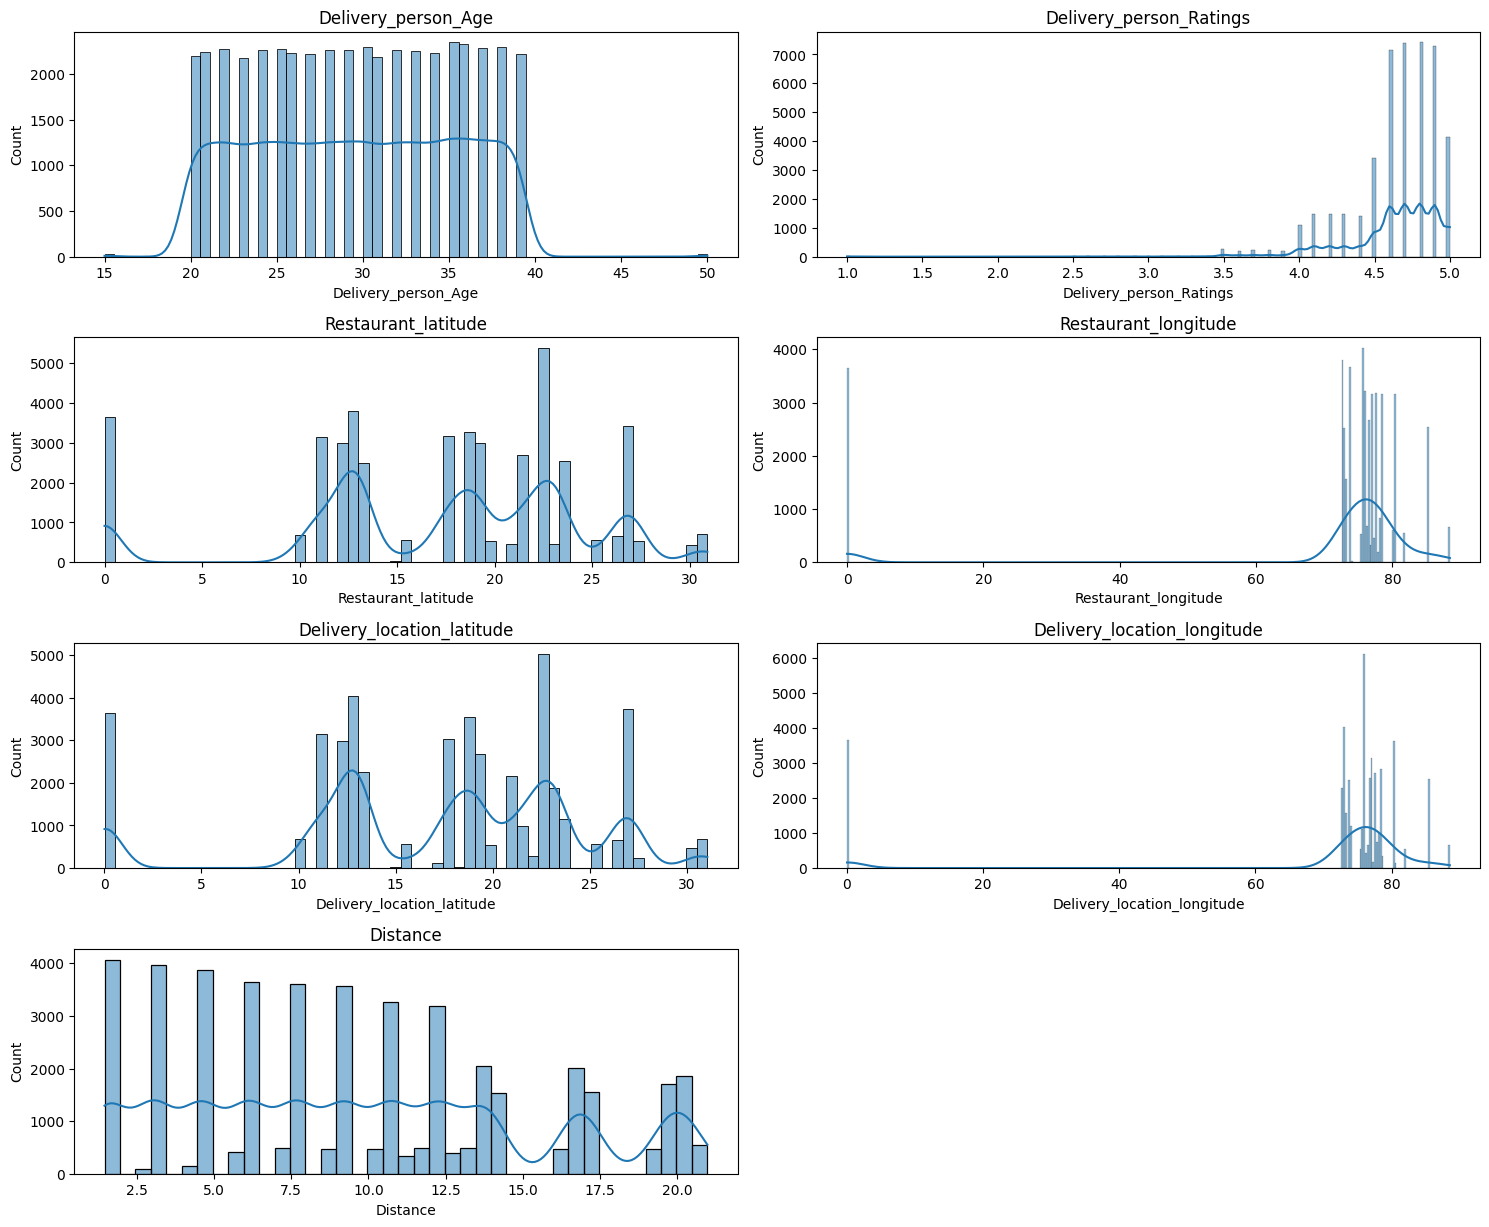

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for i, col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Observation: 
1. The Random Sample Imputation doesn't distorts the distribution of the feature.
2. After removing the outliers in Distance feature, the latitude and longitude distribution for both the Restaurant and Delivery Location macthes correctly.

<Axes: >

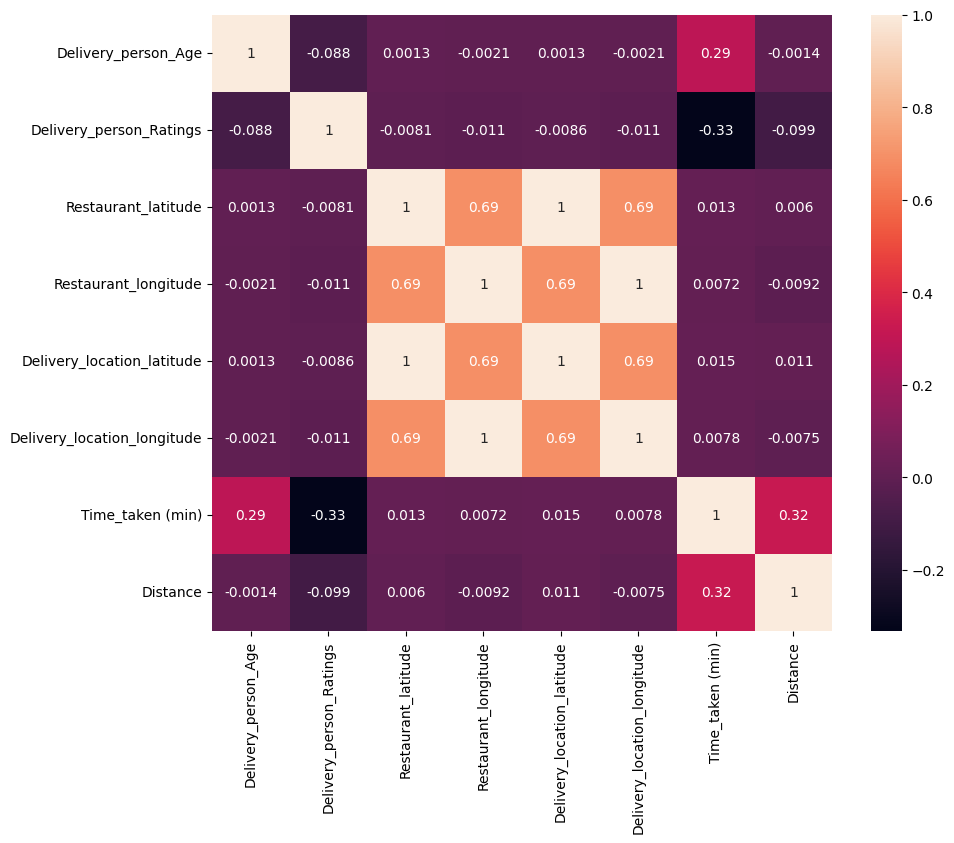

In [23]:
## correlation
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols.insert(-1, 'Time_taken (min)')].corr(),annot=True)

In [24]:
df.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1456
Time_Order_picked                 0
Weather_conditions              467
Road_traffic_density            454
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             985
Festival                        228
City                           1183
Time_taken (min)                  0
Distance                          0
dtype: int64

The number of null values in Time_Ordered has been reduced after dropping the rows taht were outliers in Distance Feature.

Now for Categorical Variables

In [25]:
df[categorical_cols]

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,Vehicle_condition,multiple_deliveries,City
0,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,No,2,3.0,Metropolitian
1,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,No,1,1.0,Metropolitian
2,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,No,1,1.0,Metropolitian
3,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,No,0,0.0,Metropolitian
4,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,No,1,1.0,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...
45148,24-03-2022,11:35,11:45,Windy,High,Meal,motorcycle,No,1,0.0,Metropolitian
45149,16-02-2022,19:55,20:10,Windy,Jam,Buffet,motorcycle,No,0,1.0,Metropolitian
45150,11-03-2022,23:50,24:05:00,Cloudy,Low,Drinks,scooter,No,1,0.0,Metropolitian
45151,07-03-2022,13:35,13:40,Cloudy,High,Snack,motorcycle,No,0,1.0,Metropolitian


In [26]:
categorical_cols

Index(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'Vehicle_condition', 'multiple_deliveries', 'City'],
      dtype='object')

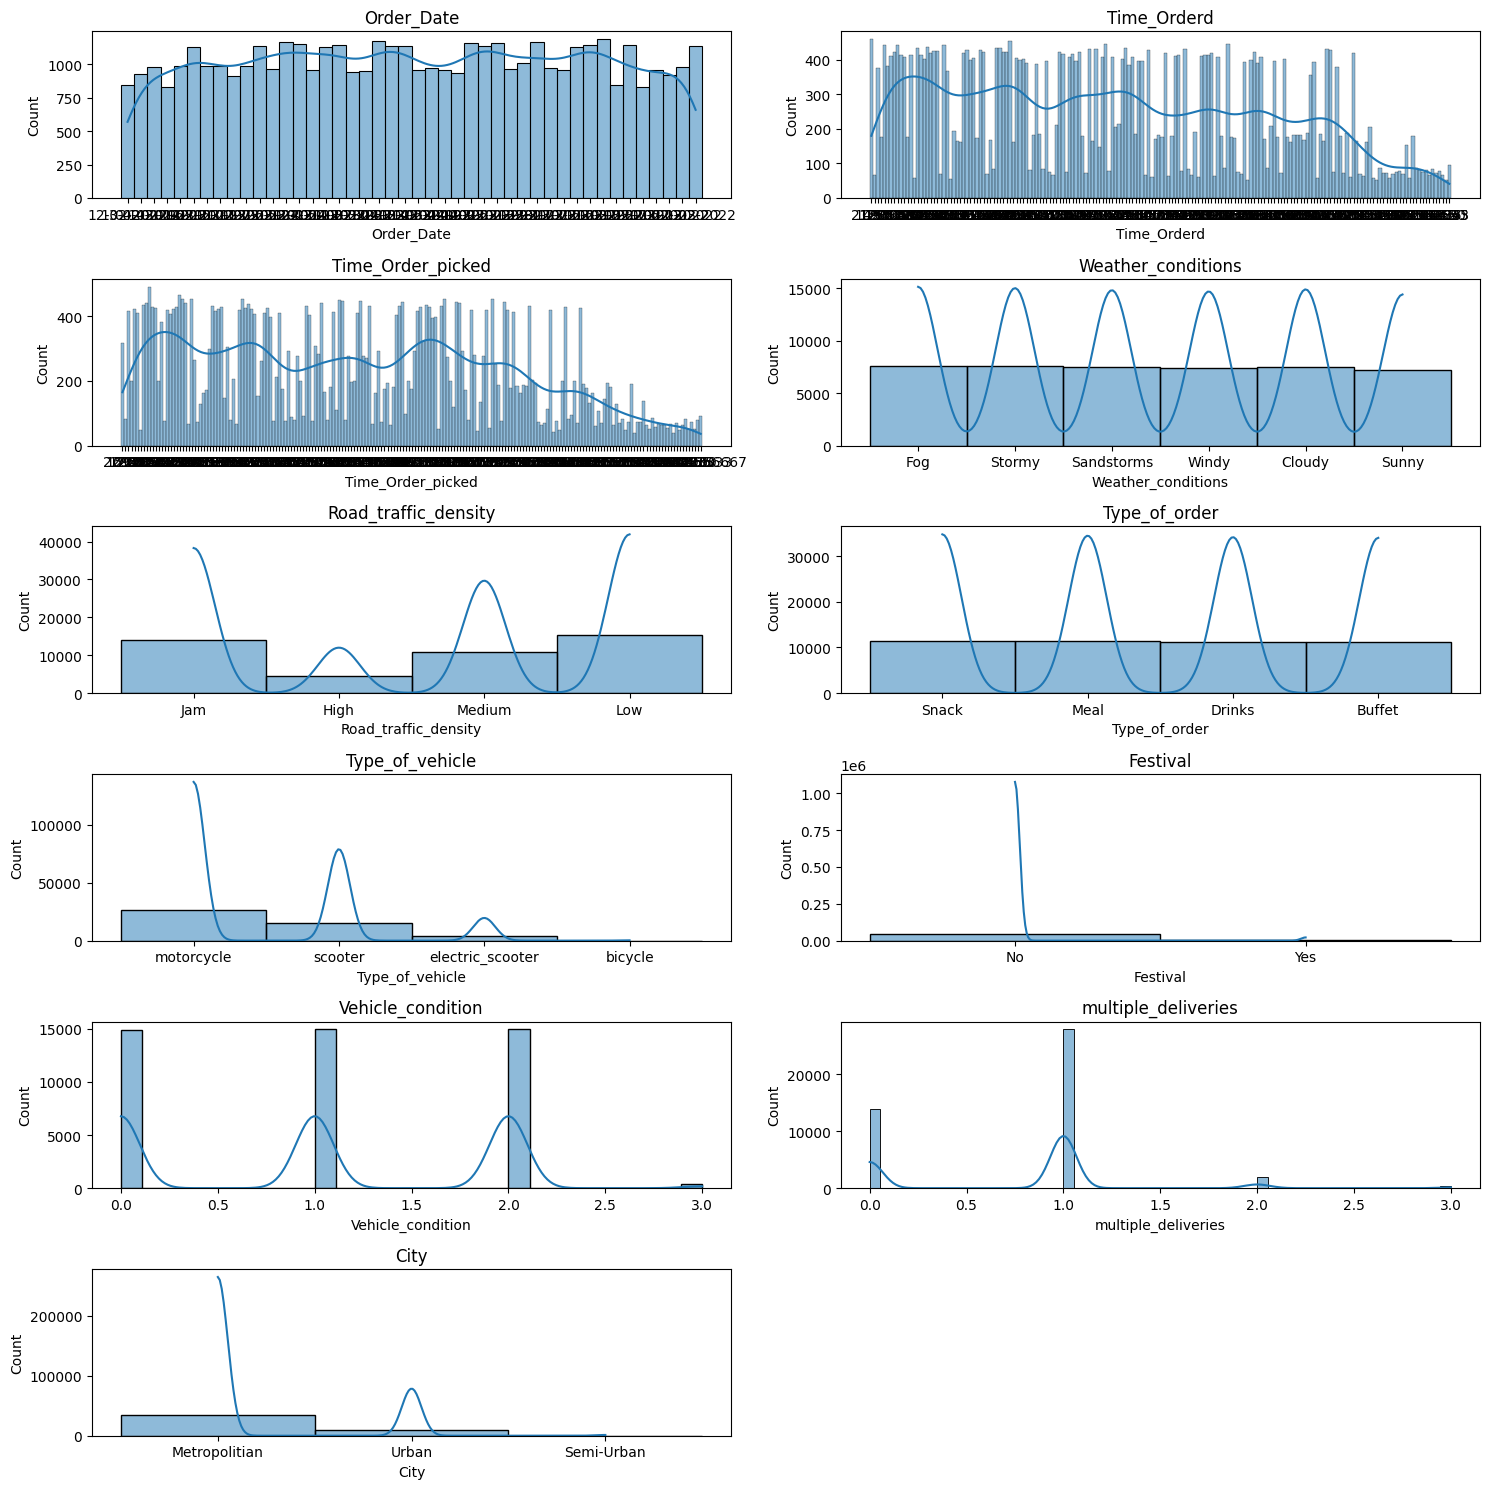

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(6,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Data Cleaning

In [28]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '09:45',
       '08:40', '0.958333333', '17:25', nan, '19:45', '19:10', '10:55',
       '21:40', '0.791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0.875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0.375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12

In [29]:
import math
def convert_decimal_to_time(decimal_value: float)->str:
    hours = math.floor(decimal_value * 24)
    minutes = round((decimal_value * 24 - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

In [30]:
for i, ele in enumerate(df['Time_Orderd']):
    if type(ele) == str:
        if ':' not in ele:
            try:
                converted_time = convert_decimal_to_time(float(ele))
                df.at[i, 'Time_Orderd'] = converted_time
            except ValueError as e:
                print(f'The error is {e}')

In [31]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '10:60', '09:45', '08:40',
       '22:60', '17:25', nan, '19:45', '19:10', '10:55', '21:40', '19:00',
       '16:45', '11:30', '15:10', '22:45', '22:10', '20:45', '22:50',
       '17:55', '09:25', '20:15', '22:25', '22:40', '23:50', '15:25',
       '10:20', '20:55', '10:40', '15:55', '20:10', '12:10', '15:30',
       '10:35', '21:10', '20:50', '12:35', '21:00', '23:40', '18:15',
       '18:20', '11:45', '12:45', '23:30', '10:50', '21:25', '10:10',
       '17:50', '22:20', '12:40', '23:55', '10:25', '08:45', '23:45',
       '19:55', '22:15', '23:10', '09:15', '18:25', '18:45', '16:50',
       '24:00', '14:20', '10:15', '08:50', '09:00', '17:45', '16:35',
       '08:30', '21:45', '19:40', '14:50', '18:10', '12:20', '12:50',
       '09:10',

In [32]:
df['Time_Orderd'] = df[['Time_Orderd']].apply(random_sample_impute)
print(f"After: {df['Time_Orderd'].isnull().sum()}")

Before: 1456
After: 0


In [33]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25',
       '0.458333333', '19:15', '16:55', '11:40', '15:15', '22:55',
       '22:25', '20:55', '23:05', '0.75', '0.958333333', '09:40', '20:20',
       '22:35', '0.916666667', '23:55', '15:40', '10:30', '0.875',
       '10:50', '16:05', '20:15', '12:15', '15:45', '22:15', '10:45',
       '15:30', '24:05:00', '21:25', '12:45', '21:15', '18:20', '18:25',
       '11:50', '12:50', '10:55', '21:40', '10:20', '17:55', '23:50',
       '12:55', '24:10:00', '10:40', '0.375', '20:45', '0.833333333',
       '23:15', '22:20', '21:05', '0.708333333', '24:15:00', '21:20',
       '14:35', '10:25', '09:05', '16:50', '08:40', '23:40', '21:50',
       '19:55', '0.625', '1

In [34]:
for i, ele in enumerate(df['Time_Order_picked']):
    if type(ele) == str:
        if ':' not in ele:
            try:
                converted_time = convert_decimal_to_time(float(ele))
                df.at[i, 'Time_Order_picked'] = converted_time
            except ValueError as e:
                print(f'The error is {e}')

In [35]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25', '10:60',
       '19:15', '16:55', '11:40', '15:15', '22:55', '22:25', '20:55',
       '23:05', '18:00', '22:60', '09:40', '20:20', '22:35', '22:00',
       '23:55', '15:40', '10:30', '21:00', '10:50', '16:05', '20:15',
       '12:15', '15:45', '22:15', '10:45', '15:30', '24:05:00', '21:25',
       '12:45', '21:15', '18:20', '18:25', '11:50', '12:50', '10:55',
       '21:40', '10:20', '17:55', '23:50', '12:55', '24:10:00', '10:40',
       '09:00', '20:45', '19:60', '23:15', '22:20', '21:05', '16:60',
       '24:15:00', '21:20', '14:35', '10:25', '09:05', '16:50', '08:40',
       '23:40', '21:50', '19:55', '15:00', '10:35', '09:25', '17:20',
       '19:

In [36]:
df['Time_Order_picked'] = df['Time_Order_picked'].replace('24:05:00', '00:05')
df[df['Time_Order_picked'] == '00:05']

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
66,26.0,4.7,17.431477,78.400350,17.491477,78.460350,05-03-2022,23:50,00:05,Fog,Low,1,Buffet,motorcycle,0.0,No,Metropolitian,10,9.220373
336,39.0,4.6,12.935662,77.614130,13.065662,77.744130,02-03-2022,16:30,00:05,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,26,20.182634
554,23.0,5.0,12.914264,77.678400,13.024264,77.788400,23-03-2022,23:55,00:05,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,11,17.078665
561,23.0,2.5,21.173493,72.801953,21.283493,72.911953,20-03-2022,23:50,00:05,Sunny,Low,1,Buffet,motorcycle,1.0,No,Metropolitian,34,16.721288
690,39.0,4.5,17.431477,78.400350,17.521477,78.490350,02-03-2022,24:00,00:05,Fog,Low,2,Drinks,motorcycle,0.0,No,Metropolitian,37,13.830016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44667,32.0,4.8,26.891191,75.802083,26.971191,75.882083,02-03-2022,24:00,00:05,Cloudy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,41,11.917650
44734,27.0,4.6,12.321214,76.621094,12.451214,76.751094,04-03-2022,24:00,00:05,Windy,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,18,20.206421
44922,26.0,4.9,21.160437,72.774209,21.270437,72.884209,31-03-2022,23:50,00:05,Cloudy,Low,0,Snack,motorcycle,0.0,No,Metropolitian,21,16.721976
45089,26.0,4.5,17.410371,78.437225,17.540371,78.567225,25-03-2022,23:50,00:05,Fog,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,24,19.976746


In [37]:
df['Time_Order_picked'] = df['Time_Order_picked'].replace('24:10:00', '00:10')
# df[df['Time_Order_picked'] == '00:10']
df['Time_Order_picked'] = df['Time_Order_picked'].replace('24:15:00', '00:15')
# df[df['Time_Order_picked'] == '00:15']

In [38]:
##Fetaure Engineering Process
df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0].astype(int)
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1].astype(int)
# df.drop('Time_Orderd',axis=1,inplace=True)

In [39]:
print(f"OrderHour: {df['Order_Hour'].unique()}")
print(f"OrderMin: {df['Order_Min'].unique()}")

OrderHour: [21 14 17  9 19 20 22  8 12 18 23 13 10 16 11 15 24]
OrderMin: [55 30 20 50 25 40 15 35 60 45 10  0]


We will only consider the Hour feature as the number of delivery/orders depends on which hour it is ordered.

In [40]:
##Fetaure Engineering Process
df['Pick_Hour']=df['Time_Order_picked'].str.split(':').str[0].astype(int)
df['Pick_Min']=df['Time_Order_picked'].str.split(':').str[1].astype(int)
# df.drop('Time_Order_picked',axis=1,inplace=True)

In [41]:
print(f"Pick_Hour: {df['Pick_Hour'].unique()}")
print(f"Pick_Min: {df['Pick_Min'].unique()}")

Pick_Hour: [22 15 17  9 20 21  8 19 12 18 23 13 14 11 10 16  0 24]
Pick_Min: [10  5 40 30 35 50 25 45 55 60 15  0 20]


Now We will calculate the time difference between the order and the pickup time

In [65]:
def time_difference(OH, OM, PH, PM):
    def convert_to_minutes(hour, minute):
        return hour * 60 + minute

    ordered_minutes = convert_to_minutes(OH, OM)
    pick_minutes = convert_to_minutes(PH, PM)
    difference_minutes = abs(pick_minutes - ordered_minutes)

    # Convert the difference back to Hour:Minute format
    # hours = difference_minutes // 60
    # minutes = difference_minutes % 60
    return difference_minutes

In [69]:
for i in range(len(df)):

    OH, OM = df.loc[i, 'Order_Hour'], df.loc[i, 'Order_Min']
    PH, PM = df.loc[i, 'Pick_Hour'], df.loc[i, 'Pick_Min']


    df.loc[i, 'Pickup_Duration'] = int(time_difference(OH, OM, PH, PM))
    

In [70]:
print(f"Pickup_Duration: {df['Pickup_Duration'].unique()}")

Pickup_Duration: [  15.   10.    5.  485.   60. 1425.  590.  120.  335.  570.   35.  220.
  145.  985.   90.  505.  320.  670.   40.  310. 1430.  735.  510.   55.
  600.  665. 1435. 1355.  255.  115.  850.  110.  245.  215.  545.  270.
  100.  470.  555. 1280.   30.  655.  295.  780.  355.  400.  640.  625.
  365.  235.  230.  690.   75.  195.  175.  225.  370.  415.  515.  130.
   85.  705.  290.  610.  325.   65.  170.   50.  695.  800.  730.  635.
   80.  180.  440.  260.  105.  265.  725.  305.  525. 1290.  650.  455.
  190.  300.  280.  745.  380.   45.  135.  605.  210.  155.  475.  480.
  940.  405.  775.   20.  445.  125.   25.  350.  160. 1190.  495.  890.
  755.  205.  200.  645.   70. 1265.  740.  375.  765.  790.  275.  315.
   95.  550.  680.  185.  140.  620.  285.  675.  250.  580.  595.  165.
  530.  520.  795. 1085.  345.  150.  700.  685.  430. 1145.  715.  770.
 1080.  920.  390.  535.  630.  925.  425.  855.  385.  845. 1420.  395.
  410. 1045.  615.  805.  585.  87

In [72]:
## May be these orders are cancelled or delivery partners are not assigned before cancelling
df[df['Pickup_Duration'] == 0]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,multiple_deliveries,Festival,City,Time_taken (min),Distance,Order_Hour,Order_Min,Pick_Hour,Pick_Min,Pickup_Duration


In [46]:
## so dropping these records as cancelled orders are not usefull
df = df.drop(df[df['Pickup_Duration'] == 0.0].index)
df = df.reset_index(drop=True)

In [47]:
print(df['Weather_conditions'].unique())
df['Weather_conditions'] = df[['Weather_conditions']].apply(random_sample_impute)
print(f"After: {df['Weather_conditions'].isnull().sum()}")

['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan]
Before: 466
After: 0


In [48]:
print(df['Road_traffic_density'].unique())
df['Road_traffic_density'] = df[['Road_traffic_density']].apply(random_sample_impute)
print(f"After: {df['Road_traffic_density'].isnull().sum()}")

['Jam' 'High' 'Medium' 'Low' nan]
Before: 453
After: 0


In [49]:
print(df['Festival'].unique())
df['Festival'] = df[['Festival']].apply(random_sample_impute)
print(f"After: {df['Festival'].isnull().sum()}")

['No' 'Yes' nan]
Before: 228
After: 0


In [50]:
print(df['City'].unique())
df['City'] = df[['City']].apply(random_sample_impute)
print(f"After: {df['City'].isnull().sum()}")

['Metropolitian' 'Urban' 'Semi-Urban' nan]
Before: 1183
After: 0


In [51]:
print(df['multiple_deliveries'].unique())
df['multiple_deliveries'] = df[['multiple_deliveries']].apply(random_sample_impute)
print(f"After: {df['multiple_deliveries'].isnull().sum()}")

[ 3.  1.  0. nan  2.]
Before: 985
After: 0


In [52]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
Distance                       0
Order_Hour                     0
Order_Min                      0
Pick_Hour                      0
Pick_Min                       0
Pickup_Duration                0
dtype: int64

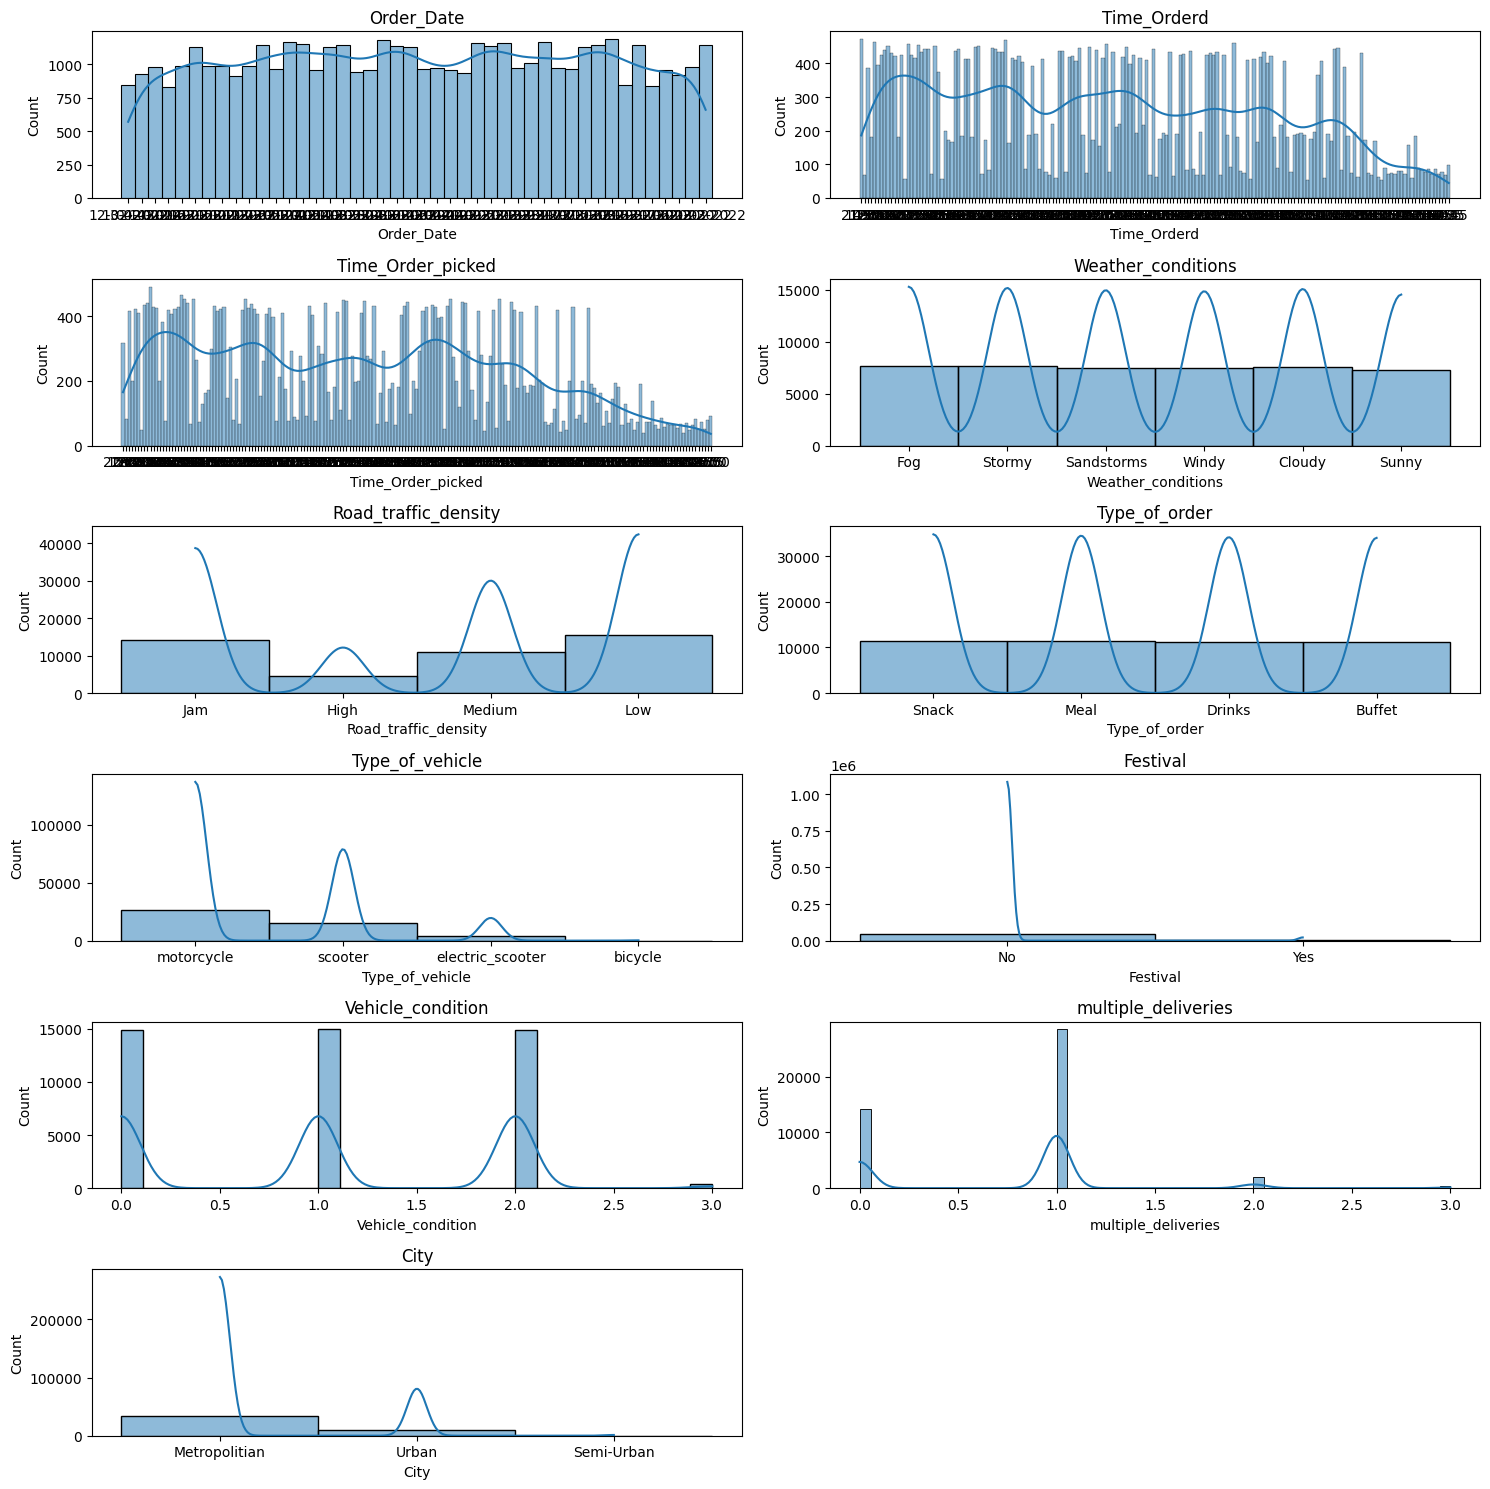

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(6,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45144 entries, 0 to 45143
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45144 non-null  float64
 1   Delivery_person_Ratings      45144 non-null  float64
 2   Restaurant_latitude          45144 non-null  float64
 3   Restaurant_longitude         45144 non-null  float64
 4   Delivery_location_latitude   45144 non-null  float64
 5   Delivery_location_longitude  45144 non-null  float64
 6   Order_Date                   45144 non-null  object 
 7   Time_Orderd                  45144 non-null  object 
 8   Time_Order_picked            45144 non-null  object 
 9   Weather_conditions           45144 non-null  object 
 10  Road_traffic_density         45144 non-null  object 
 11  Vehicle_condition            45144 non-null  int64  
 12  Type_of_order                45144 non-null  object 
 13  Type_of_vehicle 

In [55]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Distance,Order_Hour,Order_Min,Pick_Hour,Pick_Min,Pickup_Duration
count,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000,45144.000000
mean,29.551325,4.633411,17.374490,70.714369,17.438097,70.777975,1.017455,0.744374,26.297913,9.734664,17.630117,31.193403,17.350279,30.125377,46.465643
std,5.795462,0.326715,7.340840,21.205109,7.342214,21.205316,0.833426,0.572465,9.384576,5.607818,4.536515,16.576781,5.083282,17.622575,203.956884
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,10.000000,1.465067,8.000000,0.000000,0.000000,0.000000,5.000000
25%,25.000000,4.500000,12.934179,73.170283,12.985662,73.277753,0.000000,0.000000,19.000000,4.663412,15.000000,20.000000,15.000000,15.000000,5.000000
50%,30.000000,4.700000,18.554382,75.898497,18.632450,75.999490,1.000000,1.000000,26.000000,9.220209,19.000000,30.000000,19.000000,30.000000,10.000000
75%,35.000000,4.900000,22.732225,78.045359,22.783704,78.101544,2.000000,1.000000,32.000000,13.681486,21.000000,45.000000,21.000000,45.000000,15.000000
max,50.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,20.969489,24.000000,60.000000,24.000000,60.000000,1435.000000


In [56]:
df[categorical_cols.drop(['Vehicle_condition', 'multiple_deliveries'])].describe()

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45144,45144,45144,45144,45144,45144,45144,45144,45144
unique,44,176,193,6,4,4,4,2,3
top,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1185,472,491,7676,15520,11424,26225,44255,34699


In [57]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,multiple_deliveries,Festival,City,Time_taken (min),Distance,Order_Hour,Order_Min,Pick_Hour,Pick_Min,Pickup_Duration
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,...,3.0,No,Metropolitian,46,10.280582,21,55,22,10,15.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,...,1.0,No,Metropolitian,23,6.242319,14,55,15,5,10.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,...,1.0,No,Metropolitian,21,13.787860,17,30,17,40,10.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,...,0.0,No,Metropolitian,20,2.930258,9,20,9,30,10.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,...,1.0,No,Metropolitian,41,19.396618,19,50,20,5,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45139,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,...,0.0,No,Metropolitian,32,1.489846,11,35,11,45,10.0
45140,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,...,1.0,No,Metropolitian,36,11.007735,19,55,20,10,15.0
45141,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,00:05,Cloudy,...,0.0,No,Metropolitian,16,4.657195,23,50,0,5,1425.0
45142,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,...,1.0,No,Metropolitian,26,6.232393,13,35,13,40,5.0


Categorical Features are cleaned properly. Only check for Time_Orderd and Time_Order_picked

Now begin Encoding of Categorical Features

In [58]:
categorical_cols

Index(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'Vehicle_condition', 'multiple_deliveries', 'City'],
      dtype='object')

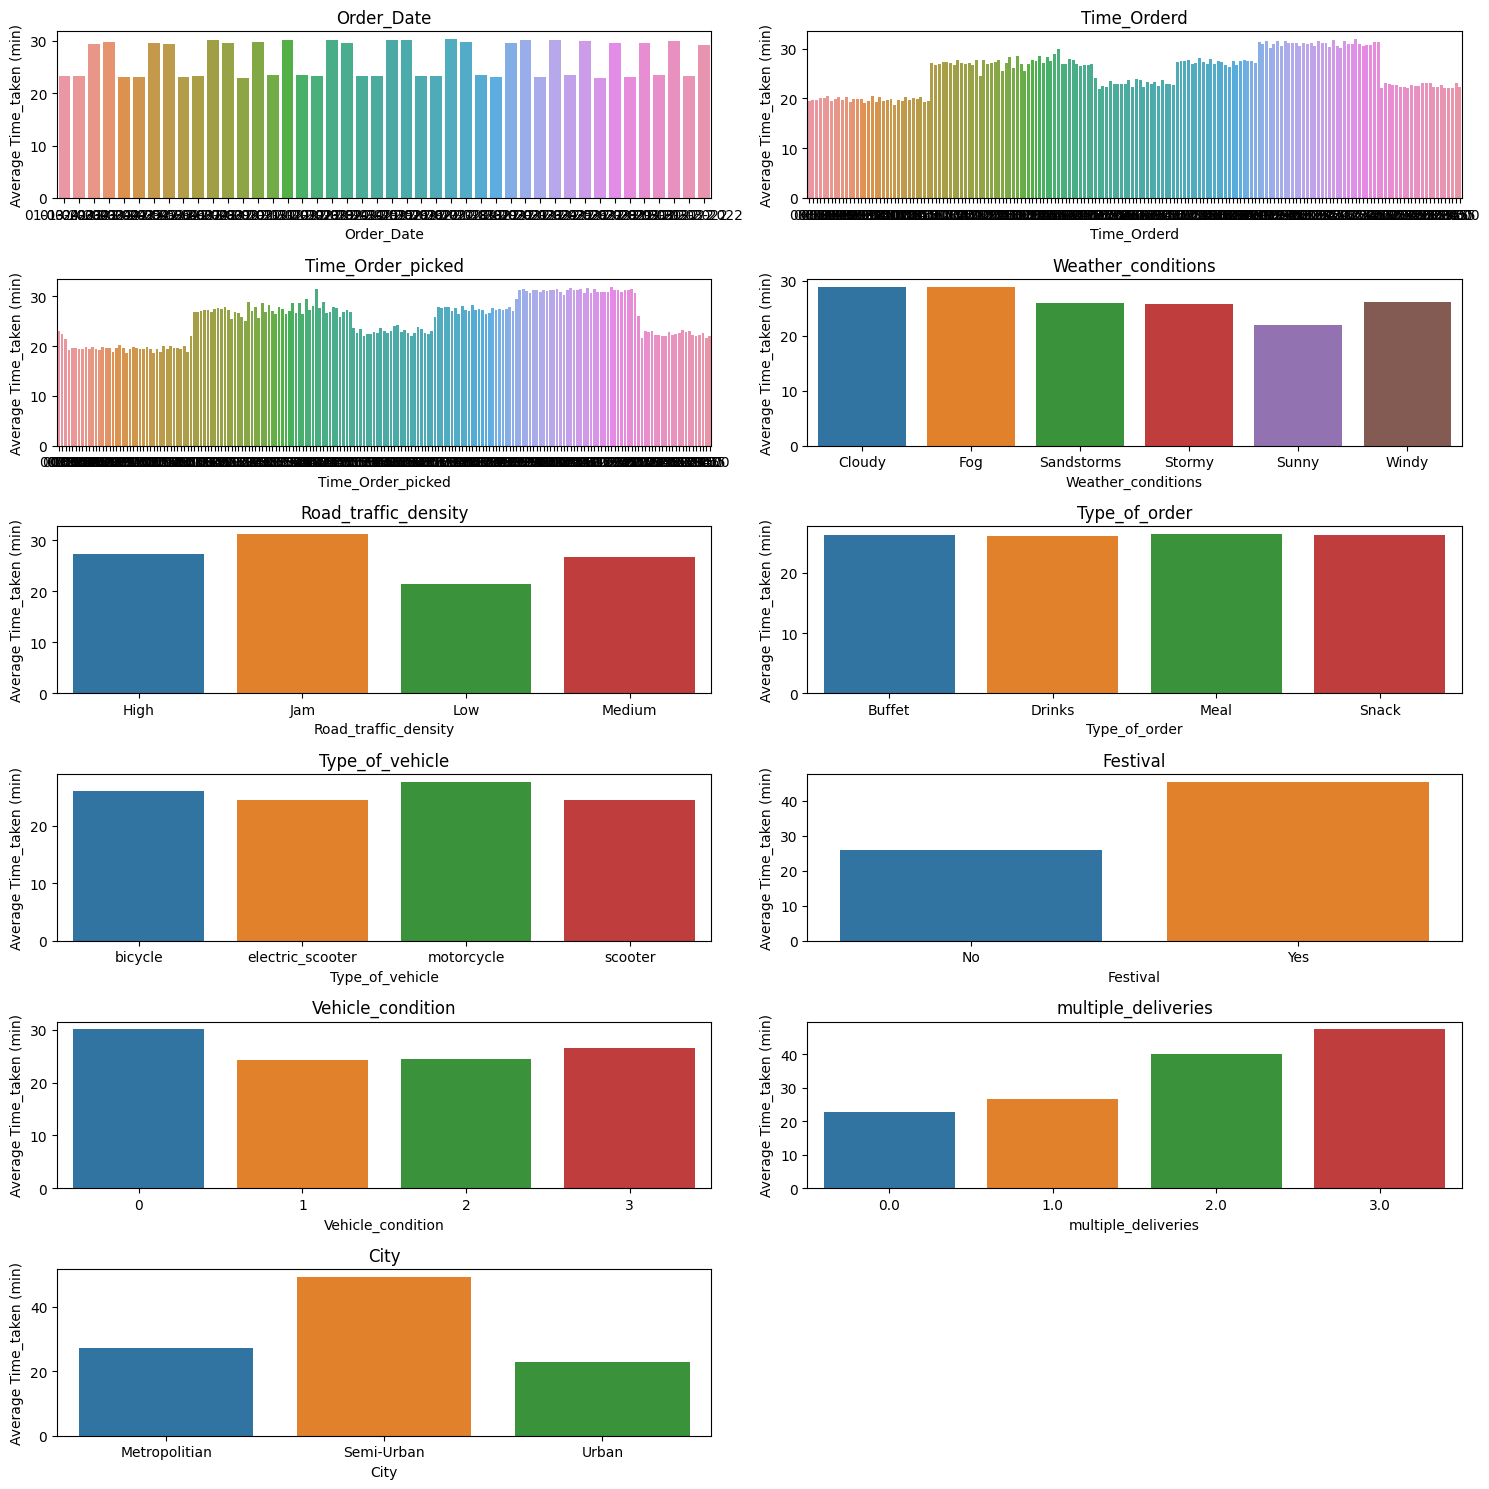

In [59]:
plt.figure(figsize=(15,15))

for i,col in enumerate(categorical_cols):
    result = df.groupby(col)['Time_taken (min)'].mean()
    plt.subplot(6,2,i+1)
    plt.title(col)
    plt.ylabel("Average Time_taken (min)")
    sns.barplot(x=result.index, y=result.values)

plt.tight_layout()
plt.show()

According to this Average Time_taken, the encoding will be done.

In [60]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
numerical_columns = numerical_columns.drop(['Vehicle_condition', 'multiple_deliveries'])
categorical_columns = categorical_columns.insert(-1, ['Vehicle_condition', 'multiple_deliveries'])
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_taken (min)', 'Distance',
       'Order_Hour', 'Order_Min', 'Pick_Hour', 'Pick_Min', 'Pickup_Duration'],
      dtype='object')
Categorical Columns: Index(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'Vehicle_condition', 'multiple_deliveries', 'City'],
      dtype='object')


In [61]:
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
values = Targetenc.fit_transform(X=df[categorical_cols], y=df['Time_taken (min)'])
values = pd.concat([values, df[numerical_columns]],axis=1)
values.head()

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,Vehicle_condition,multiple_deliveries,...,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken (min),Distance,Order_Hour,Order_Min,Pick_Hour,Pick_Min,Pickup_Duration
0,30.154578,31.411017,30.674051,28.913887,31.150677,26.276698,27.608427,25.914473,2,3.0,...,78.046106,30.397968,78.116106,46,10.280582,21,55,22,10,15.0
1,23.329018,26.692712,27.220154,25.872212,27.212264,26.428143,27.608427,25.914473,1,1.0,...,76.307589,10.043064,76.347589,23,6.242319,14,55,15,5,10.0
2,29.575820,26.850129,27.115385,25.890190,26.696435,26.194279,24.476389,25.914473,1,1.0,...,73.916619,18.652450,74.006619,21,13.787860,17,30,17,40,10.0
3,23.329018,19.861112,20.205000,25.890190,21.320747,26.291648,27.608427,25.914473,0,0.0,...,75.809346,30.919584,75.829346,20,2.930258,9,20,9,30,10.0
4,30.182912,31.090713,31.308057,28.913887,31.150677,26.276698,24.476389,25.914473,1,1.0,...,80.372929,26.593504,80.502929,41,19.396618,19,50,20,5,15.0


In [62]:
values

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,Vehicle_condition,multiple_deliveries,...,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken (min),Distance,Order_Hour,Order_Min,Pick_Hour,Pick_Min,Pickup_Duration
0,30.154578,31.411017,30.674051,28.913887,31.150677,26.276698,27.608427,25.914473,2,3.0,...,78.046106,30.397968,78.116106,46,10.280582,21,55,22,10,15.0
1,23.329018,26.692712,27.220154,25.872212,27.212264,26.428143,27.608427,25.914473,1,1.0,...,76.307589,10.043064,76.347589,23,6.242319,14,55,15,5,10.0
2,29.575820,26.850129,27.115385,25.890190,26.696435,26.194279,24.476389,25.914473,1,1.0,...,73.916619,18.652450,74.006619,21,13.787860,17,30,17,40,10.0
3,23.329018,19.861112,20.205000,25.890190,21.320747,26.291648,27.608427,25.914473,0,0.0,...,75.809346,30.919584,75.829346,20,2.930258,9,20,9,30,10.0
4,30.182912,31.090713,31.308057,28.913887,31.150677,26.276698,24.476389,25.914473,1,1.0,...,80.372929,26.593504,80.502929,41,19.396618,19,50,20,5,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45139,22.898876,27.209424,26.947368,26.127697,27.212264,26.428143,27.608427,25.914473,1,0.0,...,75.794257,26.912328,75.804257,32,1.489846,11,35,11,45,10.0
45140,30.326992,31.069196,31.258567,26.127697,31.150677,26.291648,27.608427,25.914473,0,1.0,...,0.000000,0.070000,0.070000,36,11.007735,19,55,20,10,15.0
45141,23.327480,22.146040,22.967593,28.892999,21.320747,26.194279,24.476389,25.914473,1,0.0,...,80.242439,13.052394,80.272439,16,4.657195,23,50,0,5,1425.0
45142,23.007874,27.737701,26.979683,28.892999,27.212264,26.276698,27.608427,25.914473,0,1.0,...,76.986241,11.041753,77.026241,26,6.232393,13,35,13,40,5.0


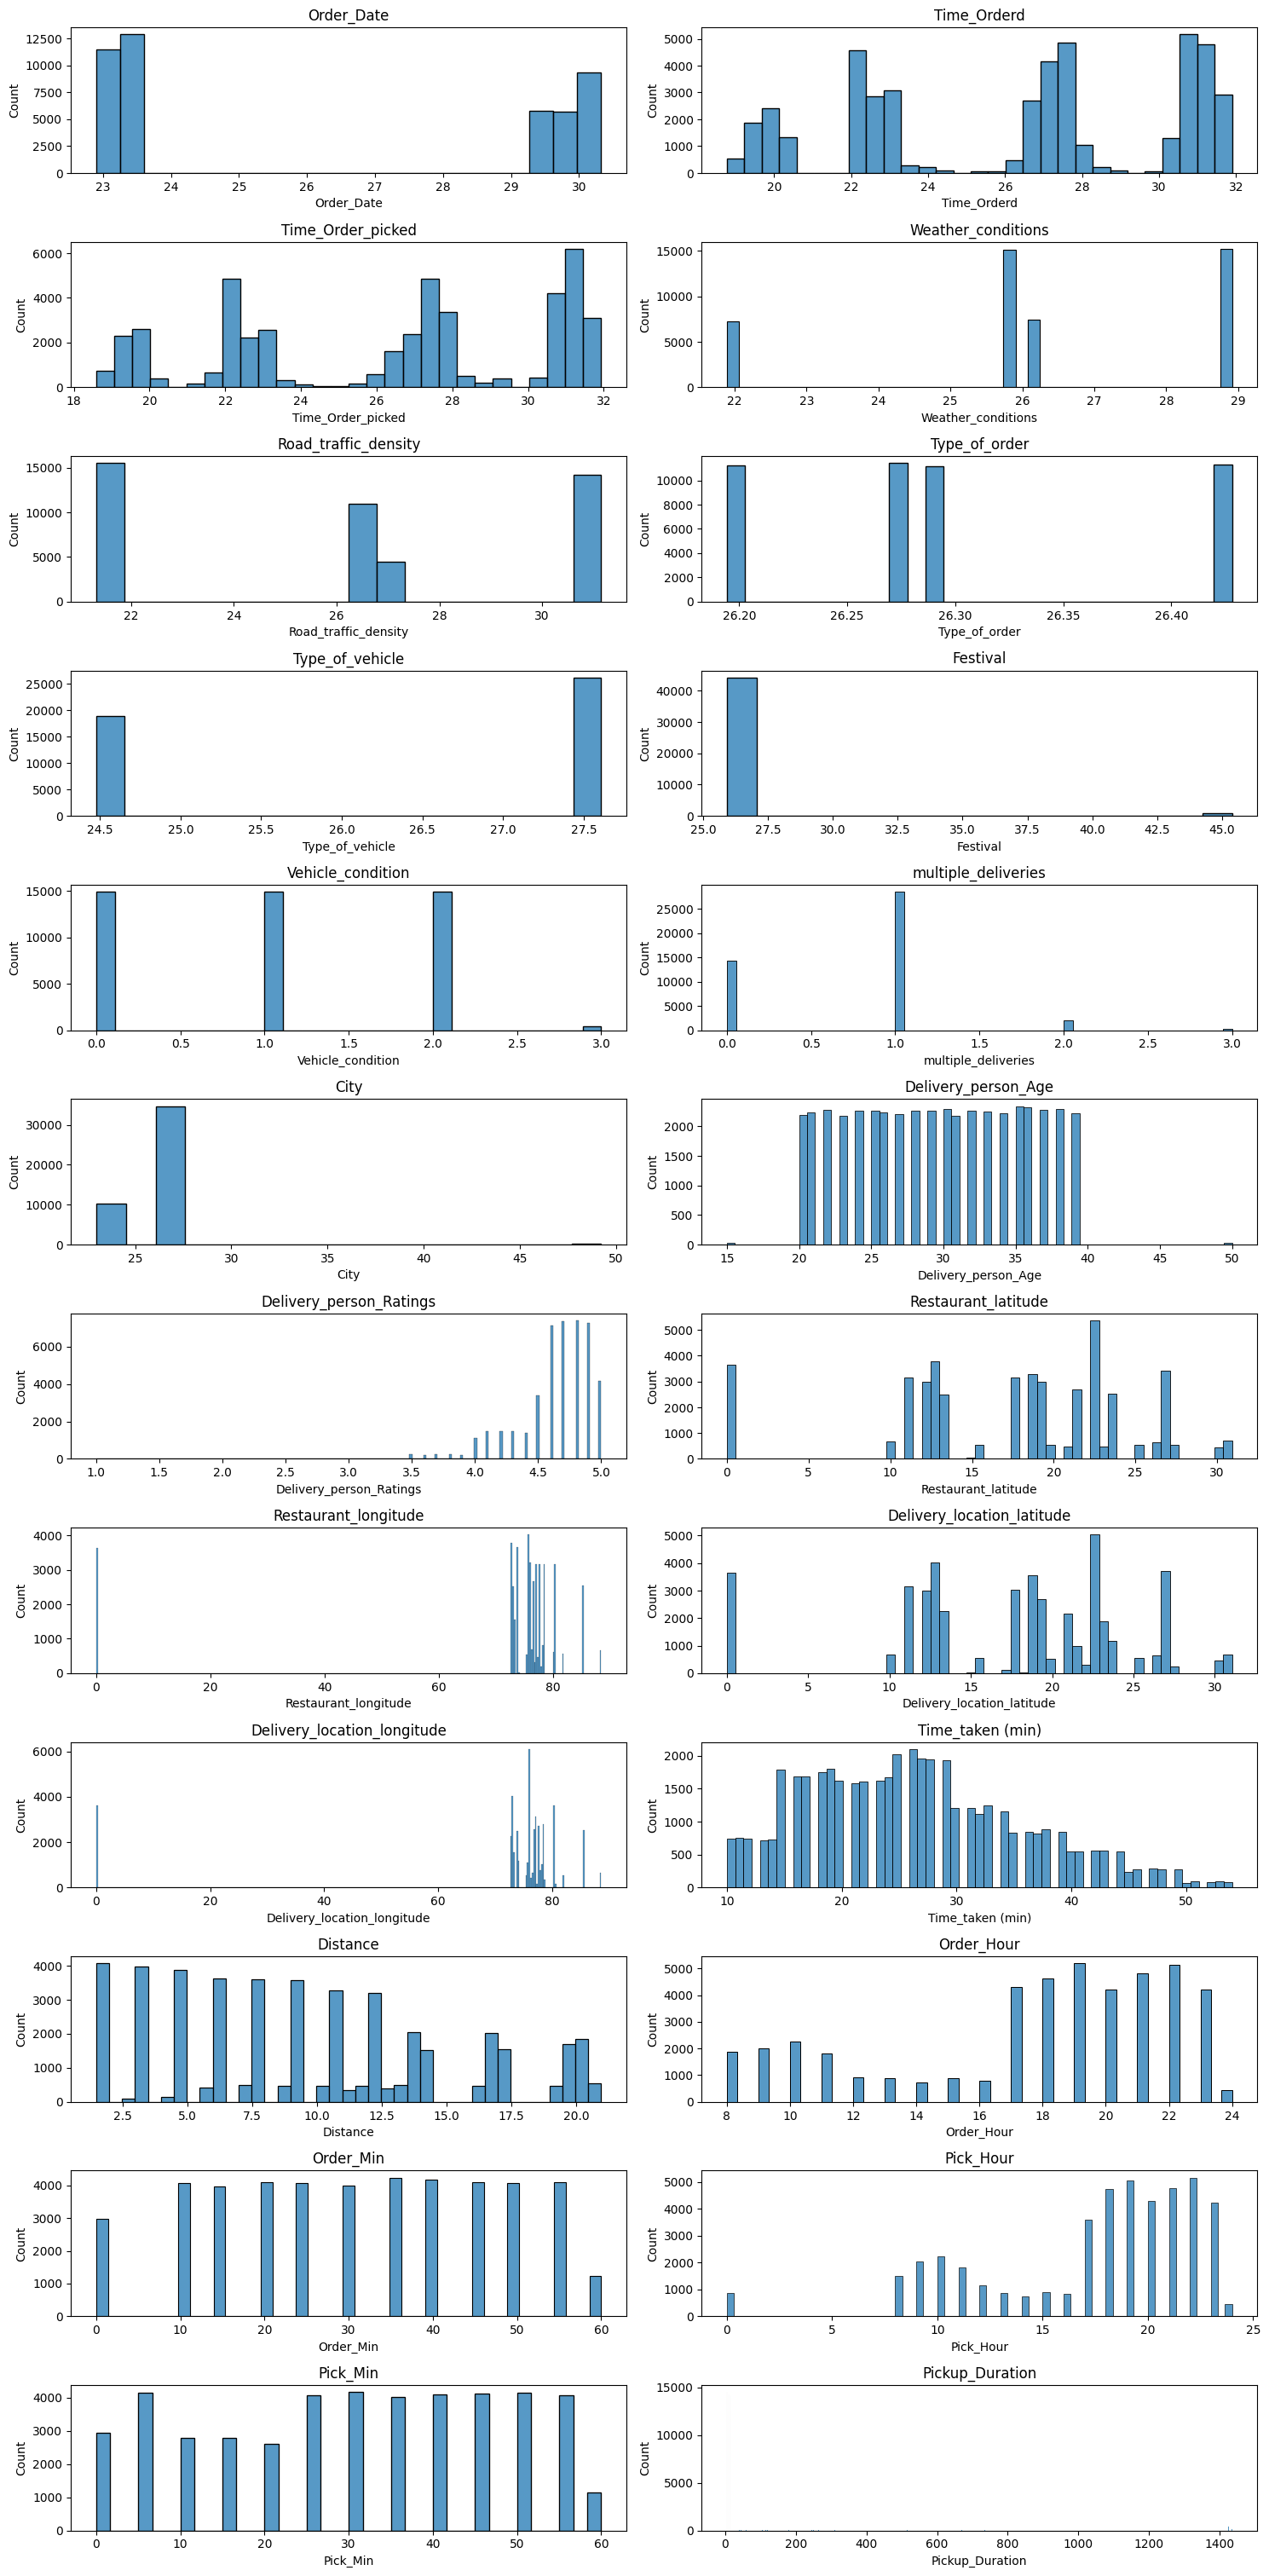

In [63]:
plt.figure(figsize=(15,50))
for i, col in enumerate(values.columns):
    plt.subplot(20,2,i+1)
    sns.histplot(values[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [64]:
values.isnull().sum()

Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Type_of_order                  0
Type_of_vehicle                0
Festival                       0
Vehicle_condition              0
multiple_deliveries            0
City                           0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_taken (min)               0
Distance                       0
Order_Hour                     0
Order_Min                      0
Pick_Hour                      0
Pick_Min                       0
Pickup_Duration                0
dtype: int64

<Axes: >

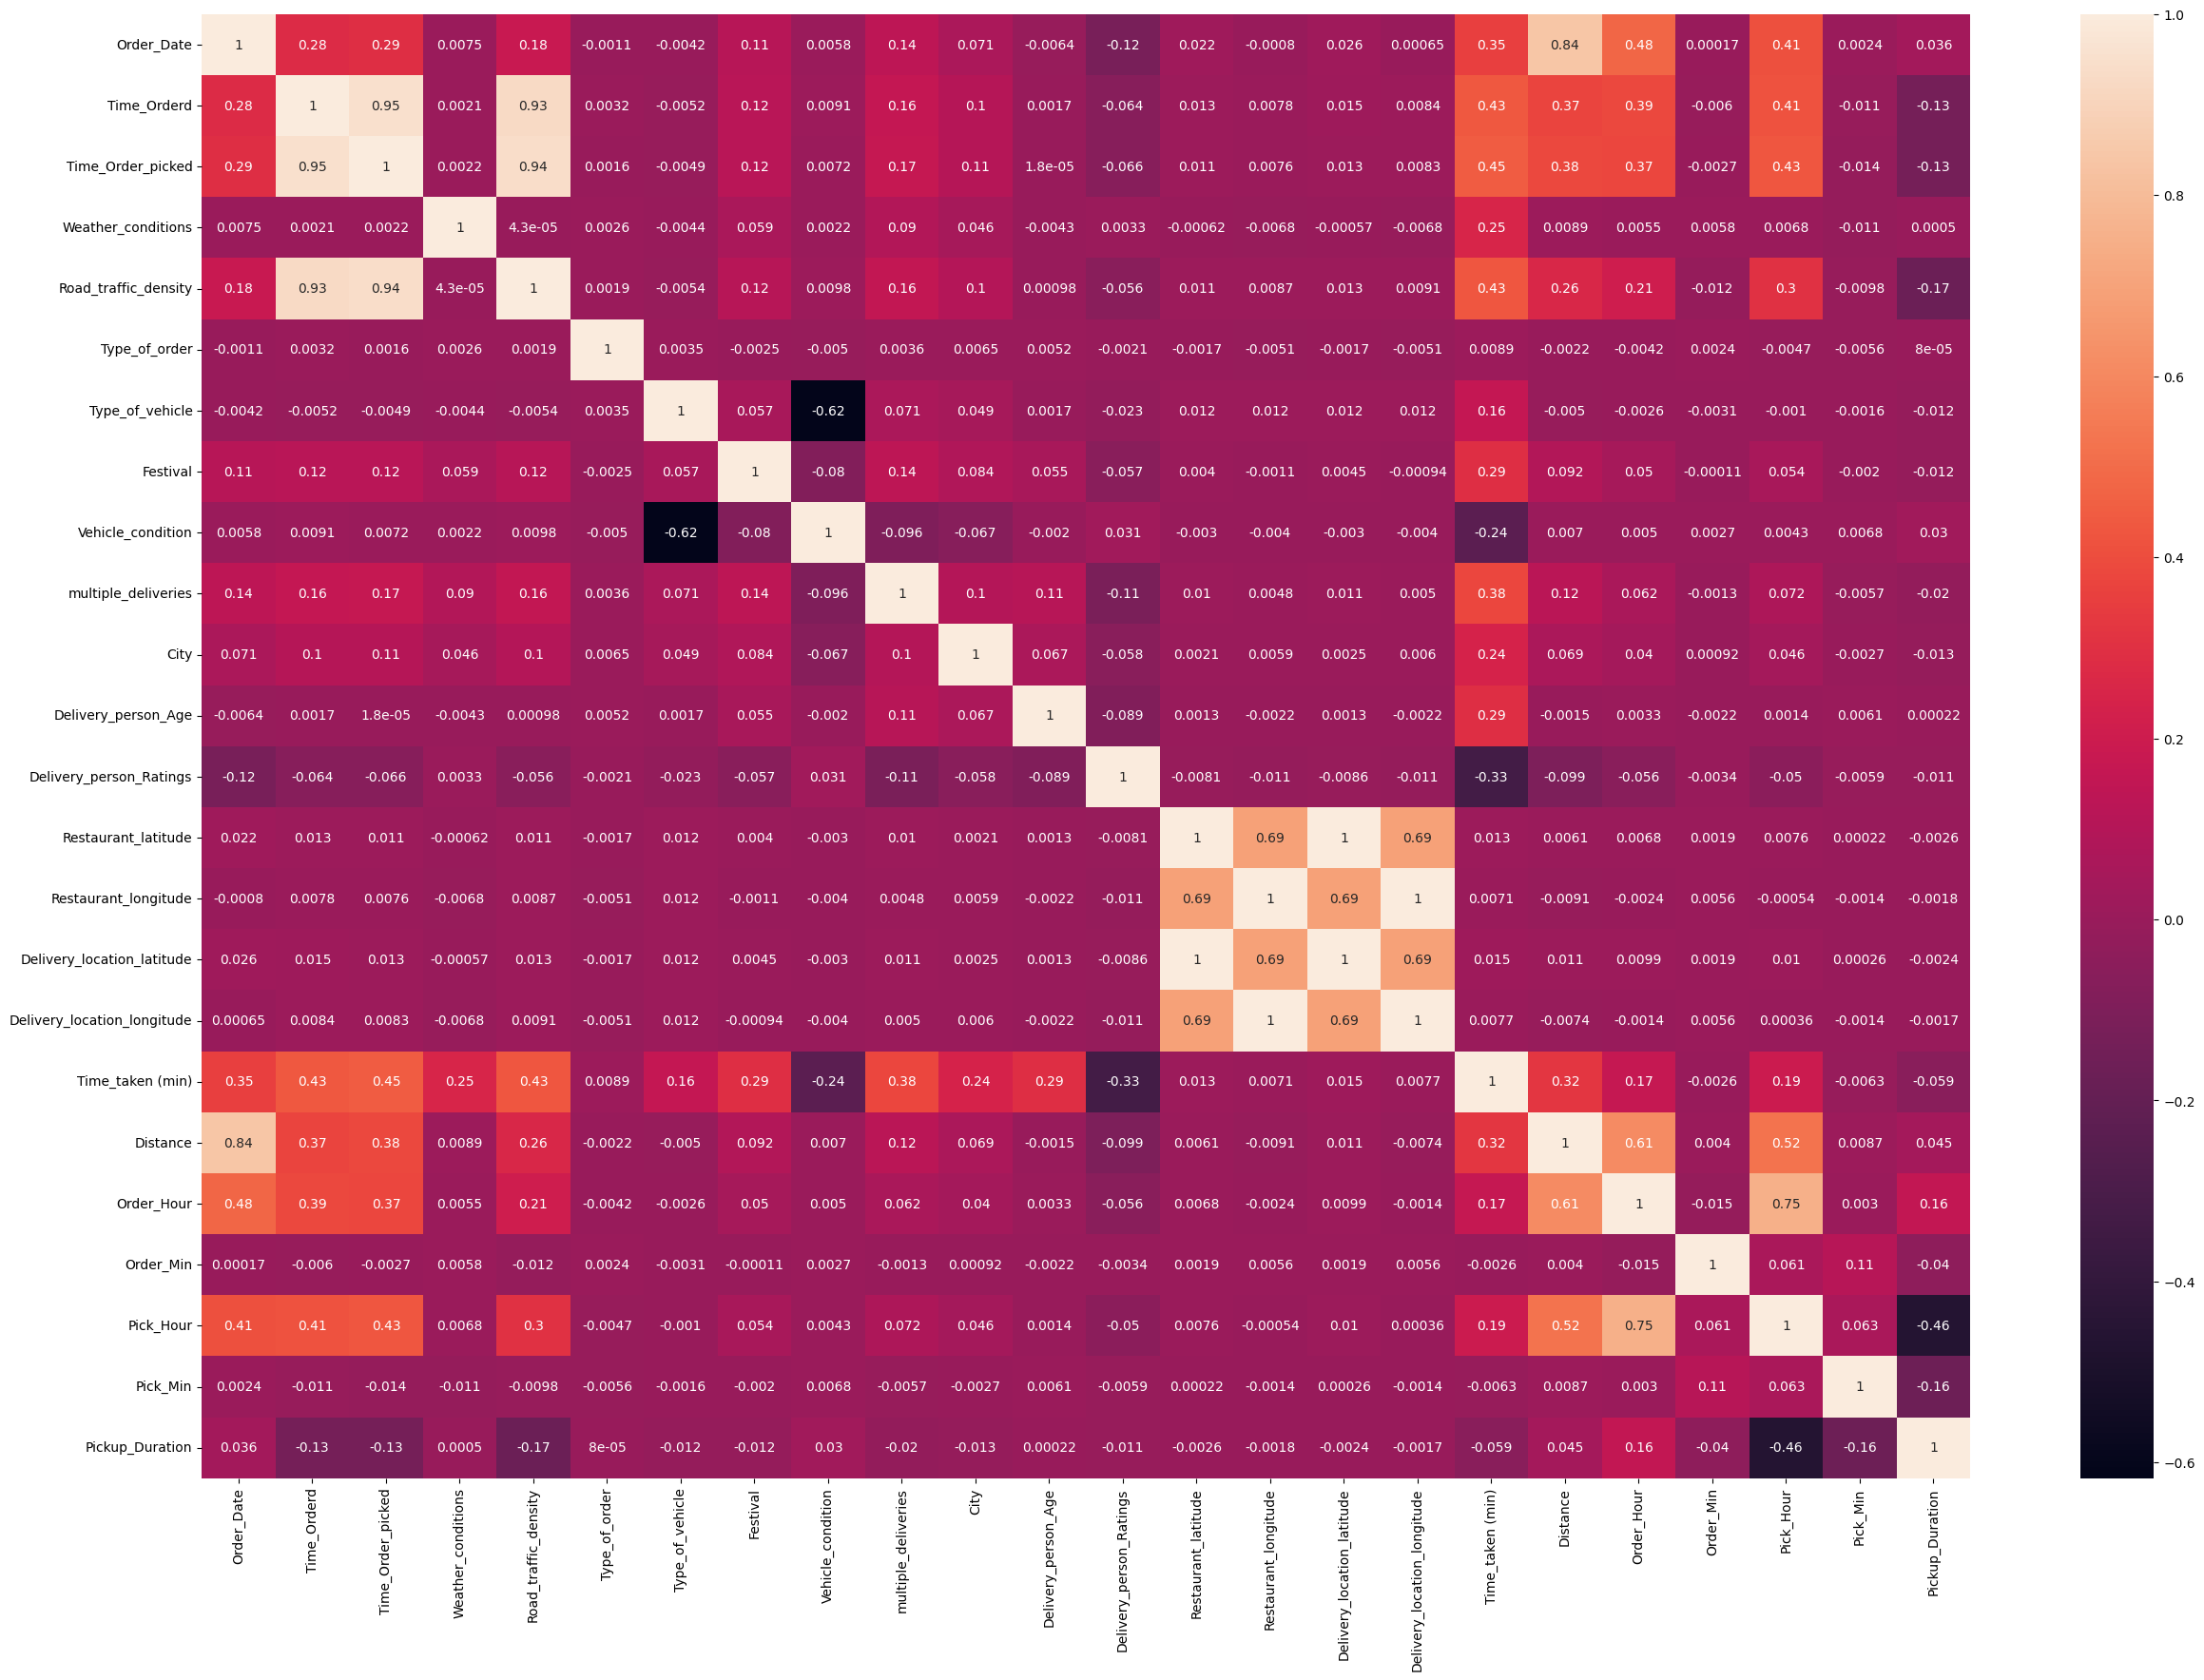

In [73]:
plt.figure(figsize=(30,20))
sns.heatmap(values.corr(),annot=True)

Feature Selection Process

In [77]:
# With the following function we can Select Highly Correlated Features with the Target Feature
# Also remove the features that are Highly Correlated with each other.

def correlation(dataset, target, target_threshold, upper_threshold, lower_threshold):
    corr_matrix = dataset.corr()
    corr_columns = corr_matrix.columns
    target_index = corr_columns.get_loc(target)
    less_corr = set() # Set of all less correlated columns with target feature

    # Checking for High Correlation between Target and other features 
    # print(corr_matrix.columns.get_loc(target))
    for i in range(len(corr_columns)):
        if abs(corr_matrix.iloc[target_index,i]) < target_threshold:
            less_corr.add(corr_columns[i])

    print("Removing Features that are less correlated with target")
    new_dat = dataset.drop(less_corr, axis=1)

    plt.figure(figsize=(30,20))
    sns.heatmap(new_dat.corr(),annot=True)
    plt.show()

    new_dat = new_dat.drop(target, axis=1)
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = new_dat.corr()
    corr_columns = corr_matrix.columns
    # target_index = corr_columns.get_loc(target)

    print("Removing Features that are Highly correlated with Each Other")
    for i in range(len(corr_columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > upper_threshold or corr_matrix.iloc[i, j] < lower_threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                colj = corr_matrix.columns[j]
                print(f"Which to drop?:\n0: {colname} OR 1: {colj}")
                ip = int(input())
                if ip == 0:
                    col_corr.add(colname)
                else:
                    col_corr.add(colj)
                

    new_dat = new_dat.drop(col_corr, axis=1)
    new_dat[target] = dataset[target]
    return new_dat

Removing Features that are less correlated with target


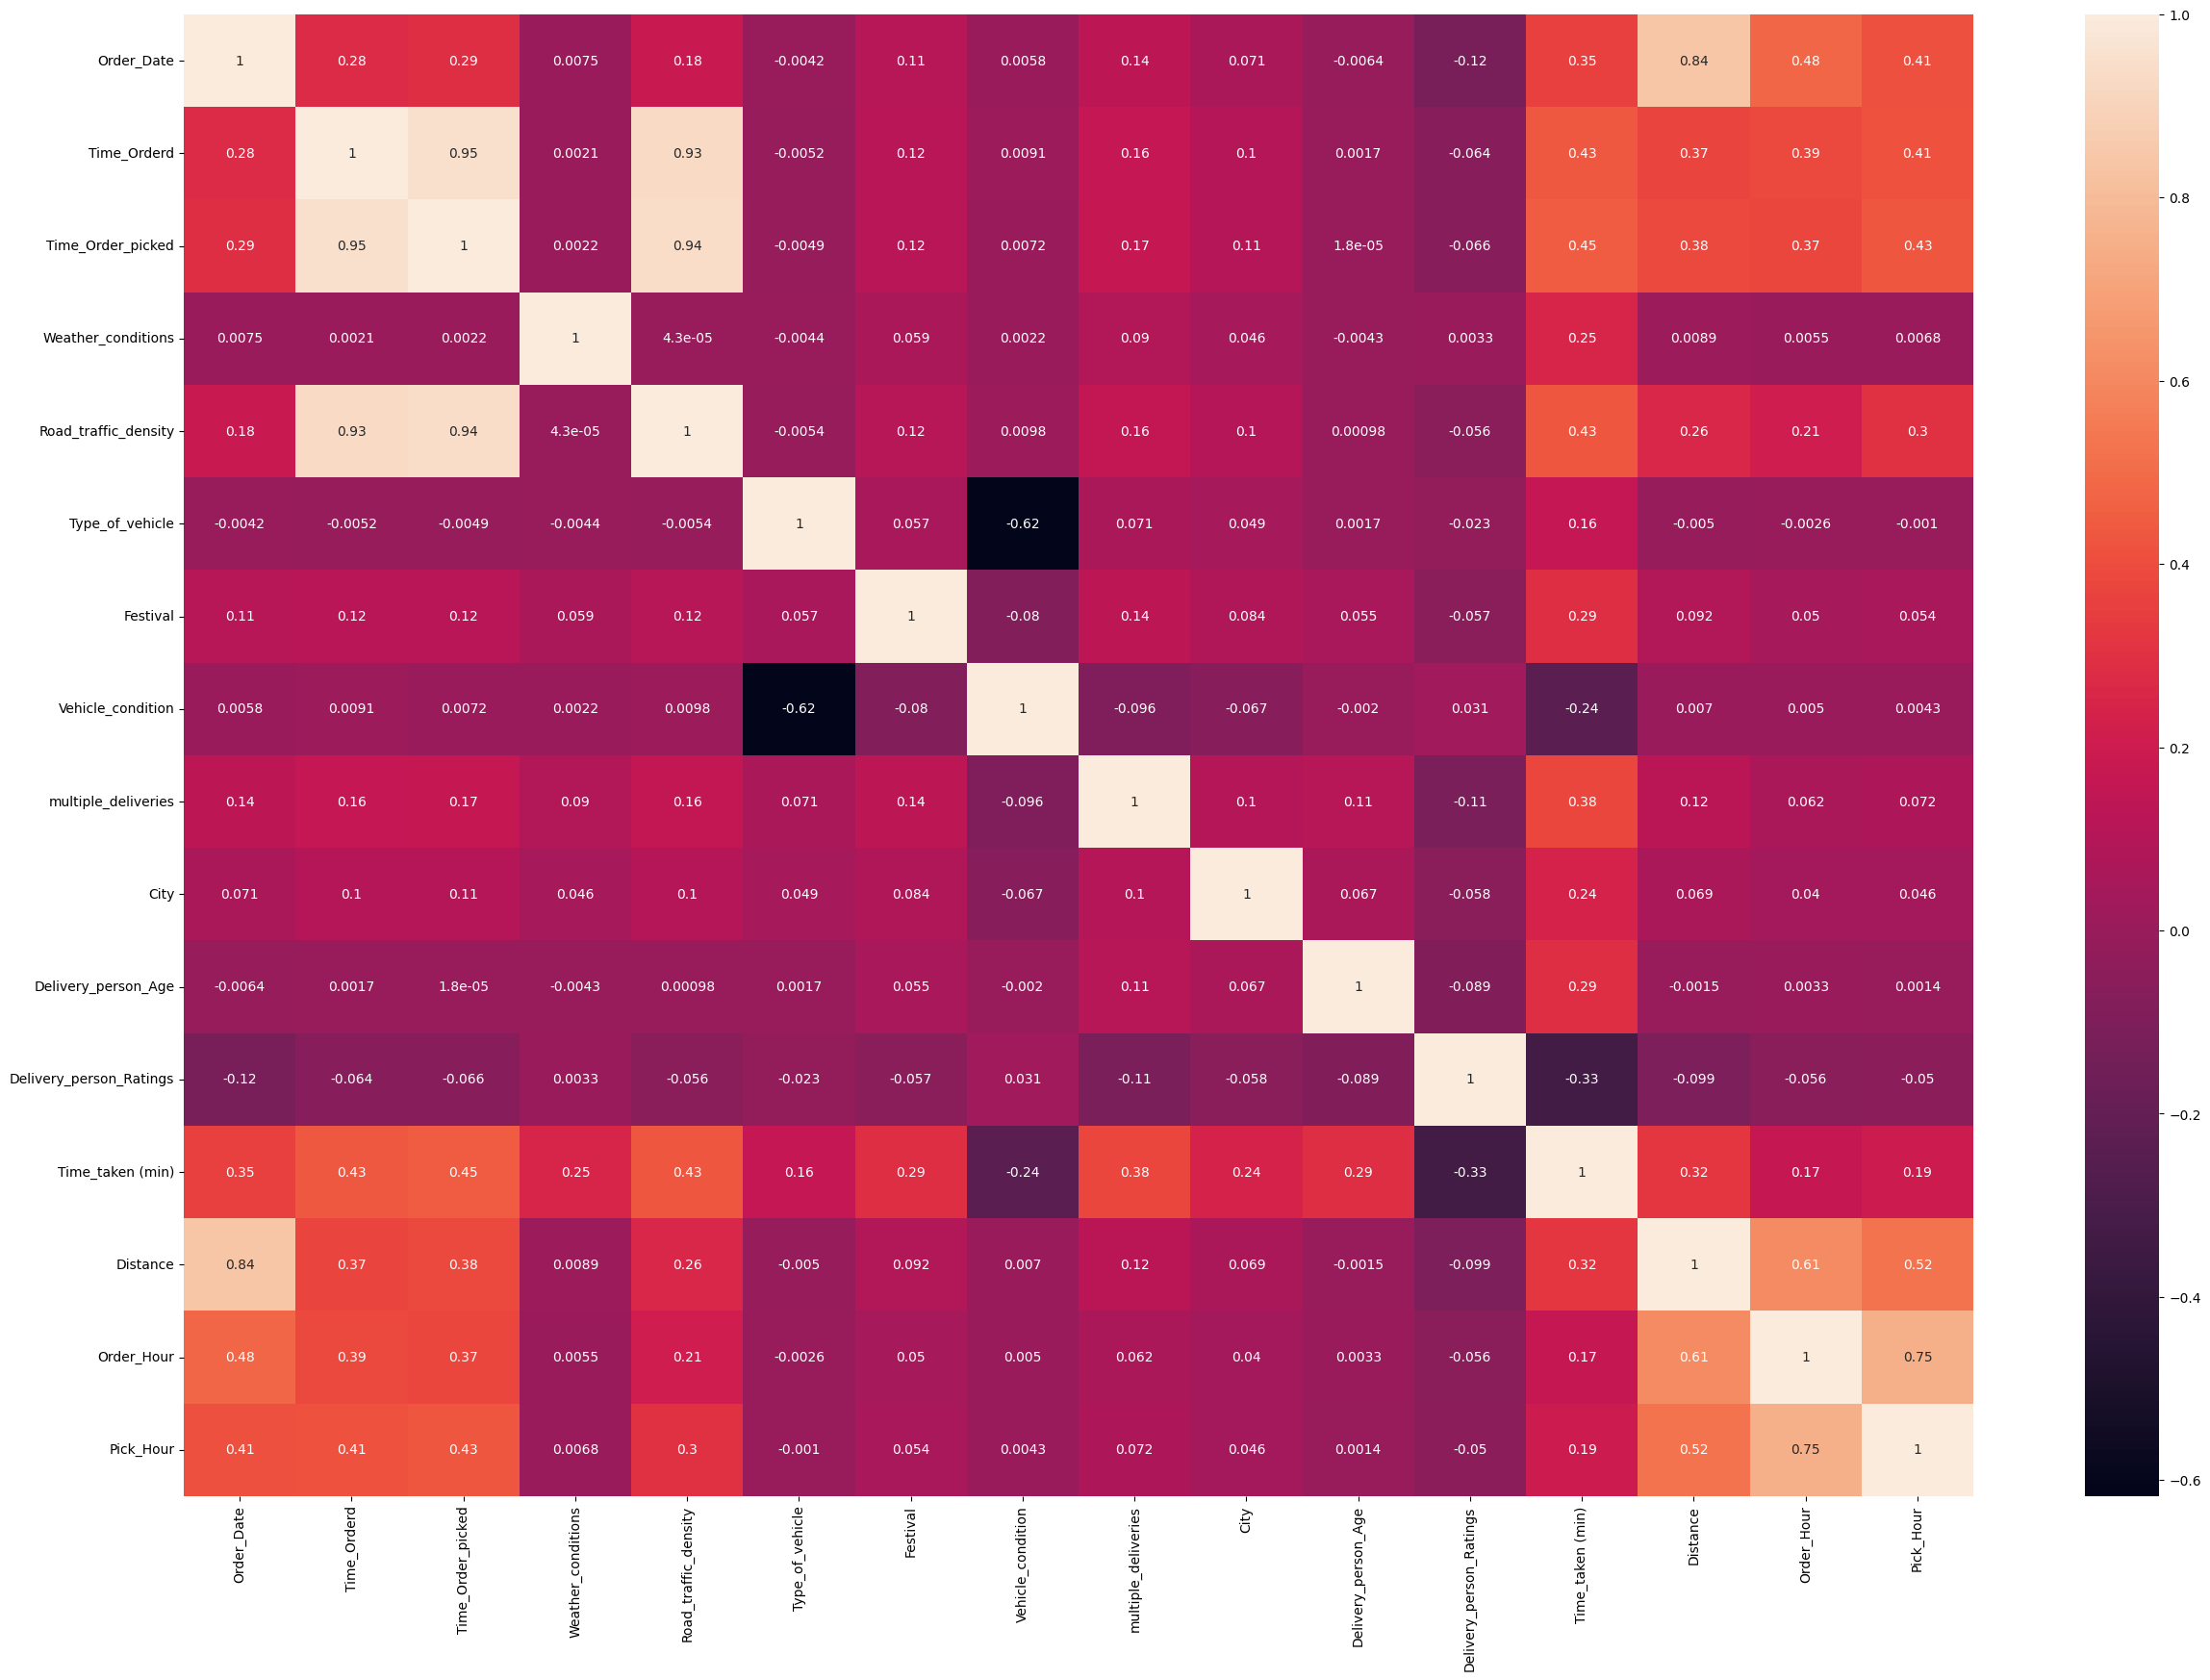

Removing Features that are Highly correlated with Each Other
Which to drop?:
0: Time_Order_picked OR 1: Time_Orderd
Which to drop?:
0: Road_traffic_density OR 1: Time_Orderd
Which to drop?:
0: Road_traffic_density OR 1: Time_Order_picked
Which to drop?:
0: Vehicle_condition OR 1: Type_of_vehicle
Which to drop?:
0: Distance OR 1: Order_Date
Which to drop?:
0: Order_Hour OR 1: Distance
Which to drop?:
0: Pick_Hour OR 1: Order_Hour


,Weather_conditions,Road_traffic_density,Festival,Vehicle_condition,multiple_deliveries,City,Delivery_person_Age,Delivery_person_Ratings,Distance,Time_taken (min)
0,28.913887,31.150677,25.914473,2,3.0,27.174414,36.0,4.2,10.280582,46
1,25.872212,27.212264,25.914473,1,1.0,27.174414,21.0,4.7,6.242319,23
2,25.890190,26.696435,25.914473,1,1.0,27.174414,23.0,4.7,13.787860,21
3,25.890190,21.320747,25.914473,0,0.0,27.174414,34.0,4.3,2.930258,20
4,28.913887,31.150677,25.914473,1,1.0,27.174414,24.0,4.7,19.396618,41
...,...,...,...,...,...,...,...,...,...,...
45139,26.127697,27.212264,25.914473,1,0.0,27.174414,30.0,4.8,1.489846,32
45140,26.127697,31.150677,25.914473,0,1.0,27.174414,21.0,4.6,11.007735,36
45141,28.892999,21.320747,25.914473,1,0.0,27.174414,30.0,4.9,4.657195,16
45142,28.892999,27.212264,25.914473,0,1.0,27.174414,20.0,4.7,6.232393,26


In [78]:
val1 = correlation(values, 'Time_taken (min)', 0.1, 0.6, -0.6)
val1

In [79]:
val1.to_csv('new_data.csv', index=False)

In [9]:
df['Order_Date'].unique()

array(['12-02-2022', '13-02-2022', '04-03-2022', '14-02-2022',
       '02-04-2022', '01-03-2022', '16-03-2022', '20-03-2022',
       '15-02-2022', '10-03-2022', '11-03-2022', '27-03-2022',
       '26-03-2022', '05-04-2022', '12-03-2022', '01-04-2022',
       '05-03-2022', '11-02-2022', '08-03-2022', '03-04-2022',
       '30-03-2022', '28-03-2022', '18-03-2022', '14-03-2022',
       '06-04-2022', '04-04-2022', '24-03-2022', '19-03-2022',
       '09-03-2022', '25-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], infer_datetime_format=True, dayfirst=True)
df.info()

C:\Users\mohit\AppData\Local\Temp\ipykernel_11292\3840652511.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], infer_datetime_format=True, dayfirst=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Order_Date                   45584 non-null  datetime64[ns]
 7   Time_Orderd                  43853 non-null  object        
 8   Time_Order_picked            45584 non-null  object        
 9   Weather_conditions           44968 non-null  object        
 10  Road_traffic_density         44983 non-null  object        
 11  Vehicle_condition            45584 non-nu

In [11]:
df['Day'] = df['Order_Date'].dt.day.astype(int)
df['Month'] = df['Order_Date'].dt.month.astype(int)
#df['Year'] = df['Order_Date'].dt.year.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Order_Date                   45584 non-null  datetime64[ns]
 7   Time_Orderd                  43853 non-null  object        
 8   Time_Order_picked            45584 non-null  object        
 9   Weather_conditions           44968 non-null  object        
 10  Road_traffic_density         44983 non-null  object        
 11  Vehicle_condition            45584 non-nu

In [13]:
df = df.drop(labels=['Order_Date'], axis=1)

In [14]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2


<Axes: >

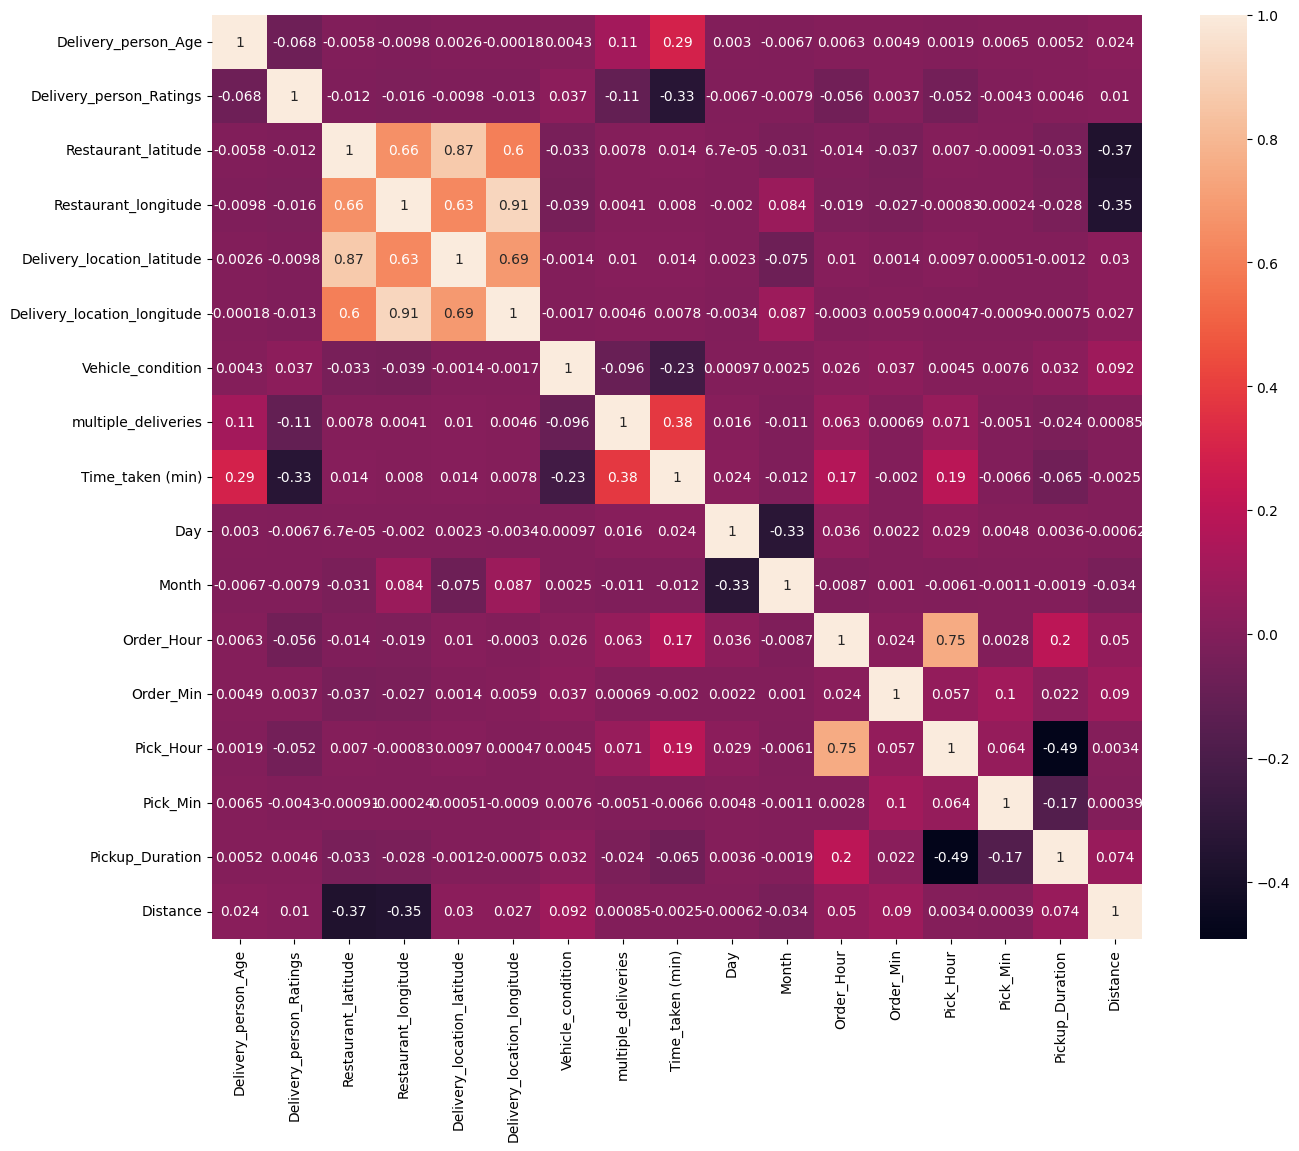

In [68]:
## correlation
plt.figure(figsize=(15,12))
sns.heatmap(df[numerical_columns].corr(),annot=True)

<Axes: >

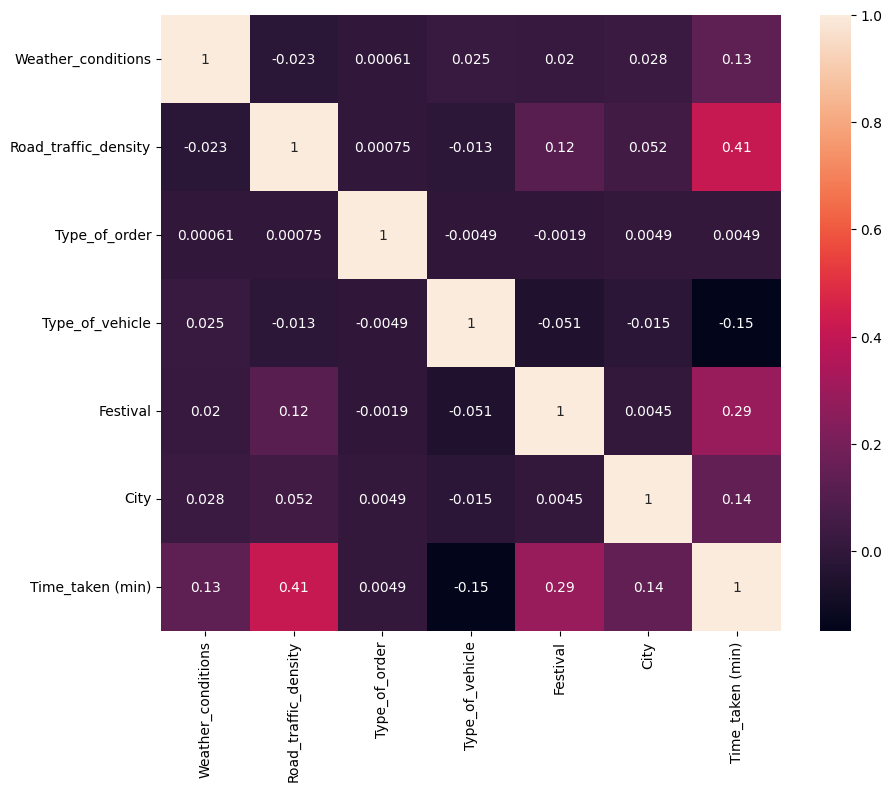

In [114]:
## correlation
plt.figure(figsize=(10,8))
sns.heatmap(df[cat_col].corr(),annot=True)